In [1]:
# Project: Adventure_Works Analysis using SQlite and Python!!

### by Ifeoma Augusta Adigwe

In [2]:
## The Datasets(10 tables):

## AdventureWorks_Sales_2015 (2630 rows × 8 columns)
## AdventureWorks_Sales_2016 (23935 rows × 8 columns)
## AdventureWorks_Sales_2017 (29481 rows × 8 columns)
## AdventureWorks_Returns (1809 rows × 4 columns)
## AdventureWorks_Customers (18148 rows × 13 columns)
## AdventureWorks_Calendar (912 rows × 1 columns)
## AdventureWorks_Products (293 rows × 11 columns)
## AdventureWorks_Territories (10 rows × 4 columns)
## AdventureWorks_Product_Subcategories (37 rows × 3 columns)
## AdventureWorks_Product_Categories (4 rows × 2 columns)

In [3]:
## Stakeholders Expectations:

## The AdventureWorks project aims to deliver actionable insights that enhance business operations, improve customer satisfaction, and optimize resource 
## allocation. By analyzing the interconnected datasets, stakeholders can make informed decisions based on:

## Customer Insights: Detailed demographic and behavioral analysis.
## Sales Performance: Trends and performance by region and product.
## Product Insights: Popularity, pricing strategy, and inventory management.
## Return Analysis: Return rates, reasons, and financial impact.
## Marketing Effectiveness: Campaign performance and customer acquisition/retention.
## Operational Efficiency: Order fulfillment, supply chain efficiency, and cost management.
## Financial Performance: Revenue, profit margins, cost analysis, and forecasting.

## These insights will contribute to a more efficient and effective business environment, enabling stakeholders to make data-driven decisions to drive
## long-term success, growth and improve efficiency

In [4]:
#pip install pandas sqlite3

In [5]:
# Import all necessary libraries

import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# import the Database from DB Browser (sqlite)

conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()
print("Tables in the database:", tables)

Tables in the database: [('sqlite_sequence',), ('AdventureWorks_Product_Categories',), ('AdventureWorks_Product_Subcategories',), ('AdventureWorks_Calendar',), ('AdventureWorks_Territories',), ('AdventureWorks_Products',), ('AdventureWorks_Returns',), ('AdventureWorks_Sales_2015',), ('AdventureWorks_Sales_2016',), ('AdventureWorks_Sales_2017',), ('sales',), ('AdventureWorks_Customers',)]


In [7]:
table_names = [
    'AdventureWorks_Product_Categories', 'AdventureWorks_Product_Subcategories',
    'AdventureWorks_Calendar', 'AdventureWorks_Territories', 'AdventureWorks_Products',
    'AdventureWorks_Returns', 'AdventureWorks_Sales_2015', 'AdventureWorks_Sales_2016',
    'AdventureWorks_Sales_2017', 'AdventureWorks_Customers'
]

dataframes = {}
for table in table_names:
    query = f"SELECT * FROM {table}"
    dataframes[table] = pd.read_sql_query(query, conn)

In [8]:
# Customer Dataset!

In [9]:
dataframes['AdventureWorks_Customers'].head(2)


,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,CustomerAge,AgeGroup
0,11000,MR.,JON,YANG,1966-04-08 00:00:00,Married,Male,jon24@adventure-works.com,"$90,000",2,Bachelors,Professional,Yes,58,50-59
1,11001,MR.,EUGENE,HUANG,1965-05-14 00:00:00,Single,Male,eugene10@adventure-works.com,"$60,000",3,Bachelors,Professional,No,59,50-59


In [10]:
dataframes['AdventureWorks_Customers'].dtypes

CustomerKey        int64
Prefix            object
FirstName         object
LastName          object
BirthDate         object
MaritalStatus     object
Gender            object
EmailAddress      object
AnnualIncome      object
TotalChildren      int64
EducationLevel    object
Occupation        object
HomeOwner         object
CustomerAge        int64
AgeGroup          object
dtype: object

In [11]:
dataframes['AdventureWorks_Customers'].shape

(18148, 15)

In [12]:
# Product Dataset

In [13]:
dataframes['AdventureWorks_Products'].head(2)

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.9900
1,215,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442


In [14]:
dataframes['AdventureWorks_Products'].dtypes

ProductKey                 int64
ProductSubcategoryKey      int64
ProductSKU                object
ProductName               object
ModelName                 object
ProductDescription        object
ProductColor              object
ProductSize               object
ProductStyle              object
ProductCost              float64
ProductPrice             float64
dtype: object

In [15]:
dataframes['AdventureWorks_Products'].shape

(293, 11)

In [16]:
# Product_Categories Dataset

In [17]:
dataframes['AdventureWorks_Product_Categories'].head(2)

,ProductCategoryKey,CategoryName
0,1,Bikes
1,2,Components


In [18]:
dataframes['AdventureWorks_Product_Categories'].dtypes

ProductCategoryKey     int64
CategoryName          object
dtype: object

In [19]:
dataframes['AdventureWorks_Product_Categories'].shape

(4, 2)

In [20]:
# Product_Subcategories Dataset

In [21]:
dataframes['AdventureWorks_Product_Subcategories'].head(2)

,ProductSubcategoryKey,SubcategoryName,ProductCategoryKey
0,1,Mountain Bikes,1
1,2,Road Bikes,1


In [22]:
dataframes['AdventureWorks_Product_Subcategories'].dtypes

ProductSubcategoryKey     int64
SubcategoryName          object
ProductCategoryKey        int64
dtype: object

In [23]:
dataframes['AdventureWorks_Product_Subcategories'].shape

(37, 3)

In [24]:
# Returns Dataset

In [25]:
dataframes['AdventureWorks_Returns'].head(2)

,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity
0,1/18/2015,9,312,1
1,1/18/2015,10,310,1


In [26]:
dataframes['AdventureWorks_Returns'].dtypes

ReturnDate        object
TerritoryKey       int64
ProductKey         int64
ReturnQuantity     int64
dtype: object

In [27]:
dataframes['AdventureWorks_Returns'].shape

(1809, 4)

In [28]:
# Territories Dataset

In [29]:
dataframes['AdventureWorks_Territories'].head(2)

,SalesTerritoryKey,Region,Country,Continent
0,1,Northwest,United States,North America
1,2,Northeast,United States,North America


In [30]:
dataframes['AdventureWorks_Territories'].dtypes

SalesTerritoryKey     int64
Region               object
Country              object
Continent            object
dtype: object

In [31]:
dataframes['AdventureWorks_Territories'].shape

(10, 4)

In [32]:
# Sales Dataset

In [33]:
dataframes['AdventureWorks_Sales_2015'].head(2)

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1


In [34]:
dataframes['AdventureWorks_Sales_2015'].dtypes

OrderDate        object
StockDate        object
OrderNumber      object
ProductKey        int64
CustomerKey       int64
TerritoryKey      int64
OrderLineItem     int64
OrderQuantity     int64
dtype: object

In [35]:
dataframes['AdventureWorks_Sales_2015'].shape

(2630, 8)

In [36]:
## Sales Data!

In [37]:
# Merge the 3 Sale Tables into one
# Create two new columns -  Year and Month-name from Order Date

In [38]:
# Connect to SQLite database
conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")
cursor = conn.cursor()

sales_2015 = pd.read_sql_query("SELECT * FROM AdventureWorks_Sales_2015", conn)
sales_2016 = pd.read_sql_query("SELECT * FROM AdventureWorks_Sales_2016", conn)
sales_2017 = pd.read_sql_query("SELECT * FROM AdventureWorks_Sales_2017", conn)

sales = pd.concat([sales_2015, sales_2016, sales_2017])

# Ensure OrderDate is in the correct format
sales['OrderDate'] = pd.to_datetime(sales['OrderDate']).dt.strftime('%Y-%m-%d')

sales = sales.drop_duplicates().reset_index(drop=True)

print(sales.head())

# Create the 'sales' table if it doesn't exist
create_sales_table_query = '''
CREATE TABLE IF NOT EXISTS sales (
    OrderDate TEXT,
    StockDate TEXT,
    OrderNumber TEXT PRIMARY KEY,
    ProductKey INTEGER,
    CustomerKey INTEGER,
    TerritoryKey INTEGER,
    OrderLineItem INTEGER,
    OrderQuantity INTEGER
);
'''
cursor.execute(create_sales_table_query)
conn.commit()

# Insert data into the 'sales' table
sales.to_sql('sales', conn, if_exists='replace', index=False)

# Add new columns 'Year' and 'Month-Name'
cursor.execute("ALTER TABLE sales ADD COLUMN Year INTEGER")
cursor.execute("ALTER TABLE sales ADD COLUMN MonthName TEXT")
conn.commit()

# Ensure OrderDate is in the correct format
cursor.execute("UPDATE sales SET OrderDate = strftime('%Y-%m-%d', OrderDate)")
conn.commit()

# Update the new columns with the extracted year and month name
cursor.execute("UPDATE sales SET Year = strftime('%Y', OrderDate)")
cursor.execute("UPDATE sales SET MonthName = CASE strftime('%m', OrderDate) \
    WHEN '01' THEN 'Jan' \
    WHEN '02' THEN 'Febr' \
    WHEN '03' THEN 'March' \
    WHEN '04' THEN 'April' \
    WHEN '05' THEN 'May' \
    WHEN '06' THEN 'June' \
    WHEN '07' THEN 'July' \
    WHEN '08' THEN 'Aug' \
    WHEN '09' THEN 'Sept' \
    WHEN '10' THEN 'Oct' \
    WHEN '11' THEN 'Nov' \
    WHEN '12' THEN 'Dec' \
    END")
conn.commit()

cursor.execute("SELECT * FROM sales LIMIT 5")
rows = cursor.fetchall()
for row in rows:
    print(row)

    OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  TerritoryKey  \
0  2015-01-01   9/21/2001     SO45080         332        14657             1   
1  2015-01-01   12/5/2001     SO45079         312        29255             4   
2  2015-01-01  10/29/2001     SO45082         350        11455             9   
3  2015-01-01  11/16/2001     SO45081         338        26782             6   
4  2015-01-02  12/15/2001     SO45083         312        14947            10   

   OrderLineItem  OrderQuantity  
0              1              1  
1              1              1  
2              1              1  
3              1              1  
4              1              1  
('2015-01-01', '9/21/2001', 'SO45080', 332, 14657, 1, 1, 1, 2015, 'Jan')
('2015-01-01', '12/5/2001', 'SO45079', 312, 29255, 4, 1, 1, 2015, 'Jan')
('2015-01-01', '10/29/2001', 'SO45082', 350, 11455, 9, 1, 1, 2015, 'Jan')
('2015-01-01', '11/16/2001', 'SO45081', 338, 26782, 6, 1, 1, 2015, 'Jan')
('2015-01-02', '12/15

In [39]:
# Confirm that your Sales table includes Year and MonthName columns

query = '''
    SELECT OrderDate, StockDate, OrderNumber, ProductKey, CustomerKey, TerritoryKey, 
           OrderLineItem, OrderQuantity, Year, MonthName
    FROM sales;
'''

sales_with_year_month = pd.read_sql_query(query, conn)
sales_with_year_month

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Year,MonthName
0,2015-01-01,9/21/2001,SO45080,332,14657,1,1,1,2015,Jan
1,2015-01-01,12/5/2001,SO45079,312,29255,4,1,1,2015,Jan
2,2015-01-01,10/29/2001,SO45082,350,11455,9,1,1,2015,Jan
3,2015-01-01,11/16/2001,SO45081,338,26782,6,1,1,2015,Jan
4,2015-01-02,12/15/2001,SO45083,312,14947,10,1,1,2015,Jan
...,...,...,...,...,...,...,...,...,...,...
56041,2017-06-30,3/22/2004,SO74143,477,28517,10,3,2,2017,June
56042,2017-06-30,3/15/2004,SO74143,479,28517,10,2,1,2017,June
56043,2017-06-30,4/8/2004,SO74143,606,28517,10,1,1,2017,June
56044,2017-06-30,5/15/2004,SO74124,480,21676,7,2,2,2017,June


In [40]:
sales.describe(include = 'all')

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
count,56046,56046,56046,56046.000000,56046.000000,56046.000000,56046.000000,56046.000000
unique,911,1001,25164,NaN,NaN,NaN,NaN,NaN
top,2017-03-01,11/3/2003,SO58845,NaN,NaN,NaN,NaN,NaN
freq,306,191,8,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,438.962103,18843.645559,6.254666,1.903151,1.501873
std,NaN,NaN,NaN,118.612352,5412.449843,2.958005,1.021006,0.612379
min,NaN,NaN,NaN,214.000000,11000.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,360.000000,14016.000000,4.000000,1.000000,1.000000
50%,NaN,NaN,NaN,479.000000,18157.000000,7.000000,2.000000,1.000000
75%,NaN,NaN,NaN,529.000000,23425.750000,9.000000,2.000000,2.000000


In [41]:
# Check the numeric columns in a Table

numeric_columns = sales.select_dtypes(include=np.number).columns
print(numeric_columns)

Index(['ProductKey', 'CustomerKey', 'TerritoryKey', 'OrderLineItem',
       'OrderQuantity'],
      dtype='object')


In [42]:
# To check the unique values in a specific column

unique_values = sales['ProductKey'].unique()
print(unique_values)

[332 312 350 338 310 314 345 313 351 344 326 348 311 324 342 349 346 328
 334 347 320 330 322 340 336 371 373 354 362 385 358 377 381 379 369 370
 368 352 375 387 360 356 383 389 479 606 529 486 540 541 530 571 215 577
 214 229 477 538 573 232 581 478 528 220 537 485 604 489 578 539 580 223
 536 588 466 480 482 565 605 596 462 560 464 593 576 488 584 490 487 562
 583 471 574 575 484 535 592 473 226 564 491 582 472 569 591 599 561 598
 587 481 579 589 235 590 597 586 483 566 475 476 585 600 595 594 474 572
 563 568 567 570]


In [43]:
## Exploratory Data Analysis (EDA)

In [44]:
## Key Performance Indicator (KPI) - Sales & Product Data

In [45]:
conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")
cursor = conn.cursor()

query = '''
    SELECT 
        COUNT(DISTINCT p.ProductName) AS TotalProducts,
        SUM(s.OrderQuantity) AS TotalOrderQuantity,
        SUM(s.OrderQuantity * p.ProductPrice) AS TotalRevenue,
        SUM(s.OrderQuantity * p.ProductCost) AS TotalCost,
        SUM((s.OrderQuantity * p.ProductPrice) - (s.OrderQuantity * p.ProductCost)) AS TotalProfit
    FROM sales s
    JOIN AdventureWorks_Products p ON s.ProductKey = p.ProductKey;
'''

Sales_Analysis = pd.read_sql_query(query, conn)

Sales_Analysis

,TotalProducts,TotalOrderQuantity,TotalRevenue,TotalCost,TotalProfit
0,130,84174,2.491459e+07,1.445687e+07,1.045772e+07


In [ ]:
# Question 1

In [46]:
## 1. Perform time series analysis by analysing sales data by year and month to understand seasonlity and variation

In [47]:
## a. Sales Trend by Month and Year

In [48]:
# Total Revenue, Total Cost, Total Profit by Year and Month

conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")

query_sales_trends = '''
    SELECT 
        s.Year,
        s.MonthName,
        SUM(s.OrderQuantity * p.ProductCost) AS TotalCost,
        SUM(s.OrderQuantity * p.ProductPrice) AS TotalRevenue,
        SUM((s.OrderQuantity * p.ProductPrice) - (s.OrderQuantity * p.ProductCost)) AS TotalProfit
    FROM sales s
    JOIN AdventureWorks_Products p ON s.ProductKey = p.ProductKey
    GROUP BY s.Year, s.MonthName
    ORDER BY s.Year, strftime('%m', s.OrderDate);
'''

sales_trends = pd.read_sql_query(query_sales_trends, conn)

sales_trends['TotalCost'] = sales_trends['TotalCost'].round(2)
sales_trends['TotalRevenue'] = sales_trends['TotalRevenue'].round(2)
sales_trends['TotalProfit'] = sales_trends['TotalProfit'].round(2)

sales_trends

,Year,MonthName,TotalCost,TotalRevenue,TotalProfit
0,2015,Jan,349498.62,585312.65,235814.03
1,2015,Febr,320039.56,532226.25,212186.69
2,2015,March,384351.58,643436.10,259084.52
3,2015,April,390332.70,653364.04,263031.34
4,2015,May,393050.14,659325.90,266275.75
5,2015,June,399921.16,669988.67,270067.51
6,2015,July,289432.21,486115.01,196682.79
7,2015,Aug,318097.35,536452.82,218355.47
8,2015,Sept,203546.73,344062.87,140516.15
9,2015,Oct,235694.83,404276.60,168581.76


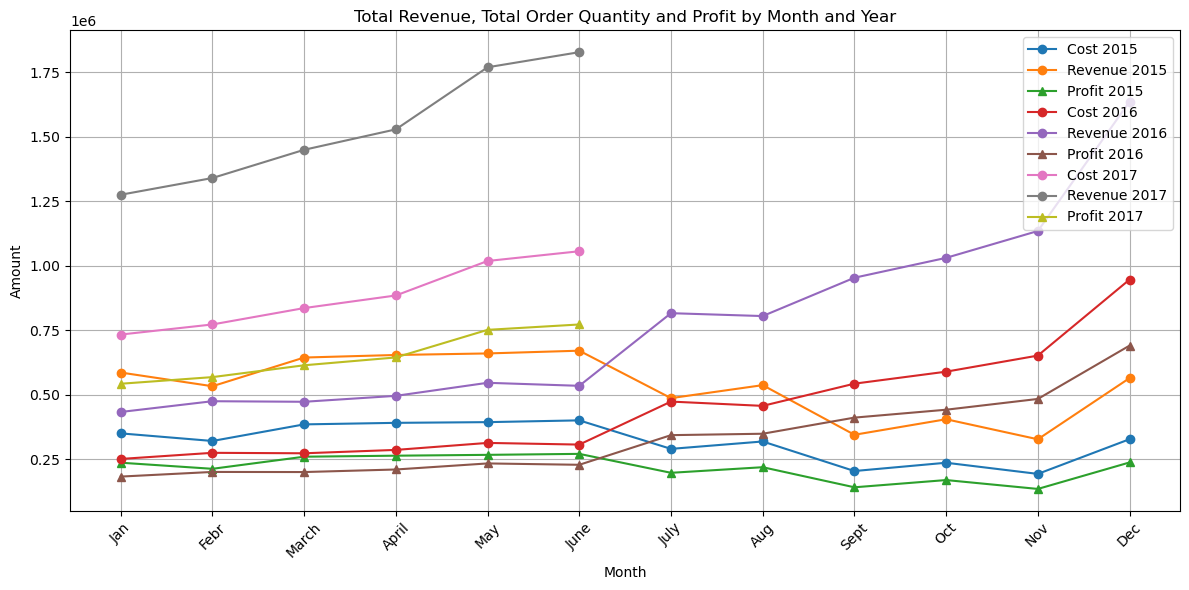

In [49]:
plt.figure(figsize=(12, 6))

# Group by Year
for year in sales_trends['Year'].unique():
    year_data = sales_trends[sales_trends['Year'] == year]
    plt.plot(year_data['MonthName'], year_data['TotalCost'], marker='o', label=f'Cost {year}')
    plt.plot(year_data['MonthName'], year_data['TotalRevenue'], marker='o', label=f'Revenue {year}')
    plt.plot(year_data['MonthName'], year_data['TotalProfit'], marker='^', label=f'Profit {year}')

plt.title('Total Revenue, Total Order Quantity and Profit by Month and Year')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [50]:
# Observation:
# I noticed there is a consistent increase and growth in total revenue and total profit from 2015 to 2017. The profit margin has also improved over 
# the years, indicating better cost management and operational efficiency.

# The Peak Months with the highest revenue and profit were recorded was in December 2016 and June 2017, respectively.
# - June 2017 has the highest profit with $771577.29 
# - December 2016 has the highest revenue with $945624.57

# Recommendation: 
# Invest more in marketing and sales strategies during peak months to maximize revenue -e.g- focus on factors contributing to high 
# revenue and profit in peak months (e.g., December 2016 and June 2017) and replicate these strategies in other months

In [51]:
## b. Sales Seasonlity by Month and Year

In [52]:

conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")
cursor = conn.cursor()

query_seasonality = '''
    SELECT 
        CASE 
            WHEN s.MonthName IN ('Dec', 'Jan', 'Febr') THEN 'Winter (Dec, Jan, Febr)'
            WHEN s.MonthName IN ('March', 'April', 'May') THEN 'Spring (March, April, May)'
            WHEN s.MonthName IN ('June', 'July', 'Aug') THEN 'Summer (June, July, Aug)'
            WHEN s.MonthName IN ('Sept', 'Oct', 'Nov') THEN 'Fall (Sept, Oct, Nov)'
        END AS Season,
        SUM(s.OrderQuantity) AS TotalOrderQuantity,
        SUM(s.OrderQuantity * p.ProductPrice) AS TotalRevenue,
        SUM(s.OrderQuantity * p.ProductCost) AS TotalCost,
        SUM((s.OrderQuantity * p.ProductPrice) - (s.OrderQuantity * p.ProductCost)) AS TotalProfit
    FROM sales s
    JOIN AdventureWorks_Products p ON s.ProductKey = p.ProductKey
    GROUP BY Season
    ORDER BY CASE 
        WHEN Season = 'Winter' THEN 1
        WHEN Season = 'Spring' THEN 2
        WHEN Season = 'Summer' THEN 3
        WHEN Season = 'Fall' THEN 4
    END;
'''

seasonality = pd.read_sql_query(query_seasonality, conn)

seasonality['TotalRevenue'] = seasonality['TotalRevenue'].round(2)
seasonality['TotalCost'] = seasonality['TotalCost'].round(2)
seasonality['TotalProfit'] = seasonality['TotalProfit'].round(2)

seasonality

,Season,TotalOrderQuantity,TotalRevenue,TotalCost,TotalProfit
0,"Fall (Sept, Oct, Nov)",19299,4191428.22,2413453.88,1777974.34
1,"Spring (March, April, May)",24699,8213422.43,4774850.98,3438571.45
2,"Summer (June, July, Aug)",17221,5672918.47,3297770.51,2375147.95
3,"Winter (Dec, Jan, Febr)",22955,6836817.71,3970796.01,2866021.70


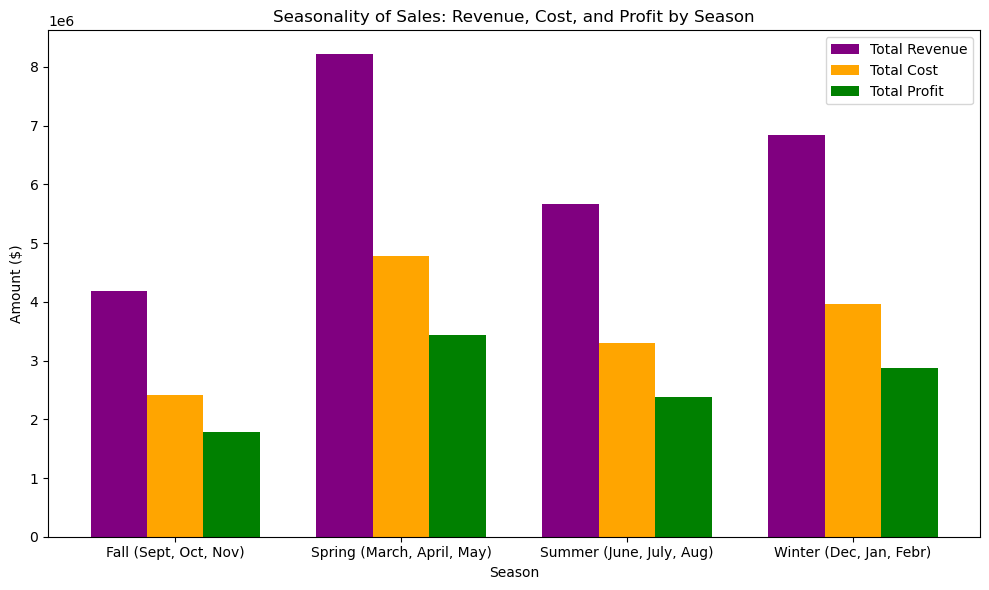

In [53]:

seasons = seasonality['Season']
total_revenue = seasonality['TotalRevenue']
total_cost = seasonality['TotalCost']
total_profit = seasonality['TotalProfit']

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = np.arange(len(seasons))

bar1 = ax.bar(index, total_revenue, bar_width, label='Total Revenue', color='purple')
bar2 = ax.bar(index + bar_width, total_cost, bar_width, label='Total Cost', color='orange')
bar3 = ax.bar(index + 2 * bar_width, total_profit, bar_width, label='Total Profit', color='green')

ax.set_xlabel('Season')
ax.set_ylabel('Amount ($)')
ax.set_title('Seasonality of Sales: Revenue, Cost, and Profit by Season')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(seasons)
ax.legend()

plt.tight_layout()
plt.show()


In [54]:
# Observation: 
# The highest total revenue and total profit were recorded in Winter and Spring, making them the most profitable seasons while the lowest 
# total revenue and total profit were recorded in Summer and Fall, indicating a need for improvement.

# Recommendation: 
# I recommend promotional activities or discounts during Summer to increase order quantity and revenue.

In [55]:
## c. Top Selling Product Categories- the most common requested categories?

In [56]:

conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")
cursor = conn.cursor()

query = '''
SELECT pc.CategoryName, SUM(s.OrderQuantity) as TotalOrderQuantity 
FROM sales s
JOIN AdventureWorks_Products p ON s.ProductKey = p.ProductKey
JOIN AdventureWorks_Product_Subcategories ps ON p.ProductSubcategoryKey = ps.ProductSubcategoryKey
JOIN AdventureWorks_Product_Categories pc ON ps.ProductCategoryKey = pc.ProductCategoryKey
GROUP BY pc.CategoryName
ORDER BY TotalOrderQuantity DESC
LIMIT 5;
'''
top_categories = pd.read_sql(query, conn)
top_categories

,CategoryName,TotalOrderQuantity
0,Accessories,57809
1,Bikes,13929
2,Clothing,12436


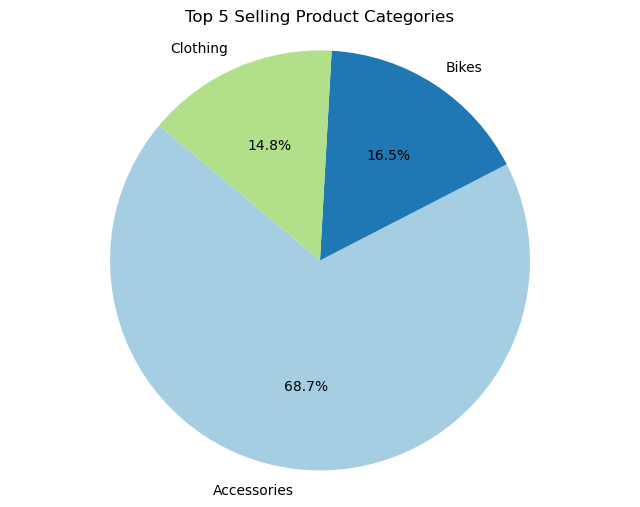

In [57]:
top_categories = pd.read_sql(query, conn)

category_names = top_categories['CategoryName']
total_quantity = top_categories['TotalOrderQuantity']

plt.figure(figsize=(8, 6))
plt.pie(total_quantity, labels=category_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Selling Product Categories')
plt.axis('equal') 
plt.show()

In [58]:
# Observations: 
# Accessories dominate sales with 57,809 units sold, significantly outperforming Clothing (12,436) and Bikes (13,929). This indicates a 
# very strong consumer preference for Accessories over the other categories.

# Recommendations: 
# Targeted promotions for Bikes and Clothing to stimulate interest and increase sales. Also ensuring sufficient stock for Accessories 
# while reviewing inventory levels for Bikes and Clothing based on sales trends

In [59]:
## d. What are the 20 top most sold Products and their Subcategories

In [60]:

conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")
cursor = conn.cursor()

query = '''
    SELECT 
        p.ProductName,
        ps.SubcategoryName,
        SUM(s.OrderQuantity) AS TotalOrderQuantity,
        SUM((s.OrderQuantity * p.ProductPrice) - (s.OrderQuantity * p.ProductCost)) AS TotalProfit,
        SUM(s.OrderQuantity * p.ProductPrice) AS TotalRevenue
    FROM sales s
    JOIN AdventureWorks_Products p ON s.ProductKey = p.ProductKey
    JOIN AdventureWorks_Product_Subcategories ps ON p.ProductSubcategoryKey = ps.ProductSubcategoryKey
    GROUP BY p.ProductName, ps.SubcategoryName
    ORDER BY TotalOrderQuantity DESC
    LIMIT 20;
'''

top_products = pd.read_sql_query(query, conn)

top_products['TotalOrderQuantity'] = top_products['TotalOrderQuantity'].round(2)
top_products['TotalProfit'] = top_products['TotalProfit'].round(2)
top_products['TotalRevenue'] = top_products['TotalRevenue'].round(2)

top_products

,ProductName,SubcategoryName,TotalOrderQuantity,TotalProfit,TotalRevenue
0,Water Bottle - 30 oz.,Bottles and Cages,7967,24886.52,39755.33
1,Patch Kit/8 Patches,Tires and Tubes,5898,8454.78,13506.42
2,Mountain Tire Tube,Tires and Tubes,5678,17736.37,28333.22
3,Road Tire Tube,Tires and Tubes,4327,10807.55,17264.73
4,AWC Logo Cap,Caps,4151,12199.79,35882.07
5,Fender Set - Mountain,Fenders,3960,54487.62,87040.80
6,Mountain Bottle Cage,Bottles and Cages,3810,23826.60,38061.90
7,Road Bottle Cage,Bottles and Cages,3329,18734.61,29927.71
8,Touring Tire Tube,Tires and Tubes,2740,8558.94,13672.60
9,ML Mountain Tire,Tires and Tubes,2119,39781.47,63548.81


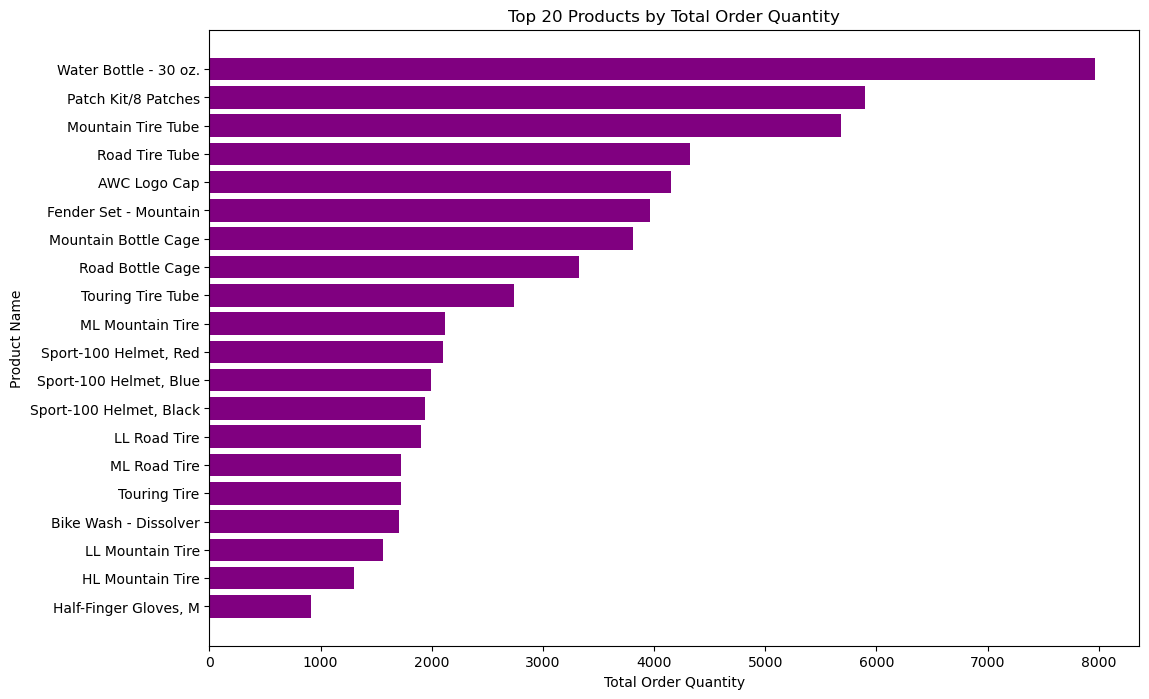

In [61]:
# Bar chart for the top 20 products based on TotalOrderQuantity

plt.figure(figsize=(12, 8))
plt.barh(top_products['ProductName'], top_products['TotalOrderQuantity'], color='purple')
plt.xlabel('Total Order Quantity')
plt.ylabel('Product Name')
plt.title('Top 20 Products by Total Order Quantity')
plt.gca().invert_yaxis()  
plt.show()

In [62]:
# Observation: 
# The top most sold products are predominantly from the Tires and Tubes Subcategory, indicating a strong demand for cycling-related 
# accessories. Notably, the Water Bottle - 30 oz. leads in sales volume, contributing significantly to both revenue and profit.

# Recommendation: 
# I recommend focus on increasing inventory for high-demand items, particularly within the Tires and Tubes and Bottles and Cages 
# subcategories. Additionally, implementing targeted marketing campaigns for these products could further enhance sales and profitability.

In [63]:
## e. Top 20 Products by Profit: Product Names and Total Order Quantity by Total Profit 

# Total Order Quantity by Total Profit of the Top 20 most sold Products

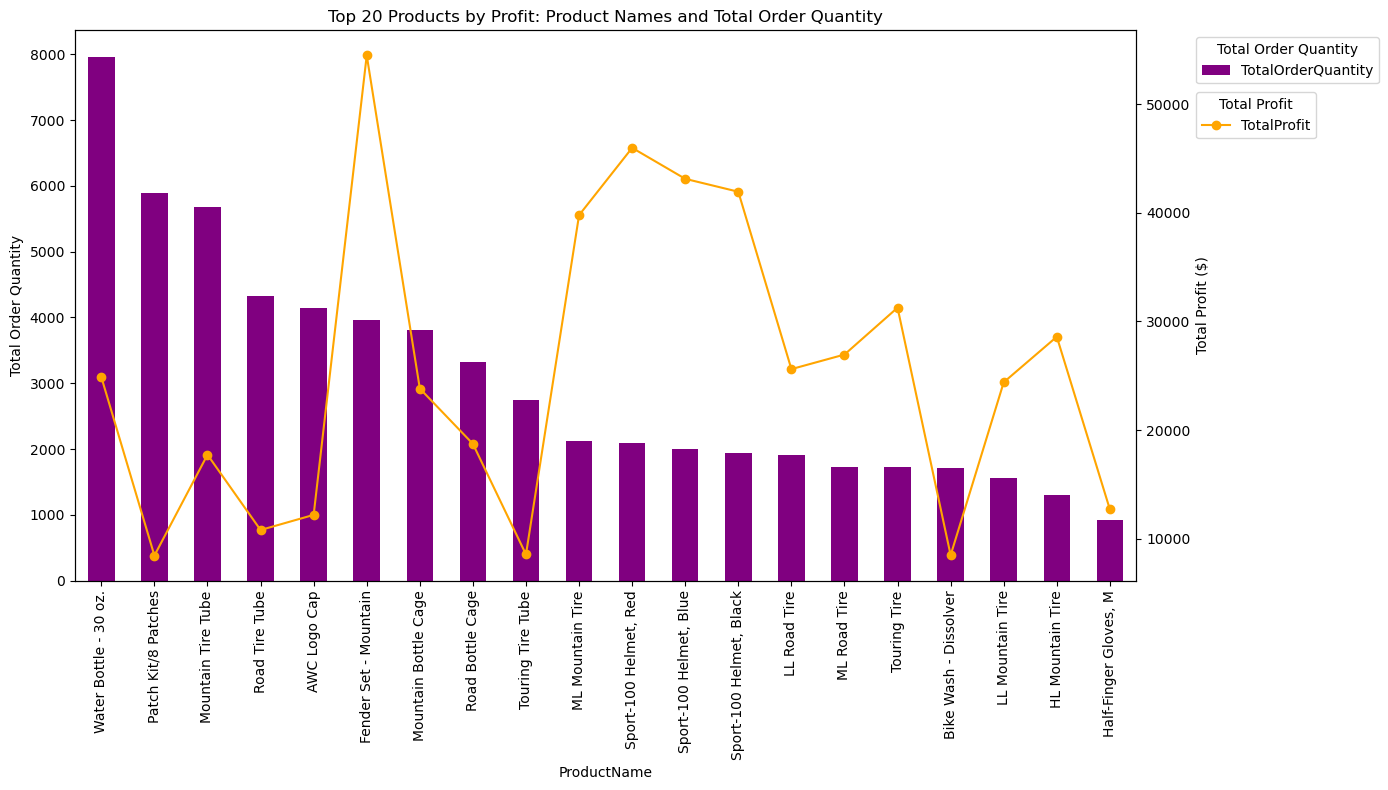

In [64]:

fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Total Order Quantity by Product Name
top_products.plot(kind='bar', x='ProductName', y='TotalOrderQuantity', ax=ax1, color='purple', legend=True)
ax1.set_ylabel('Total Order Quantity')
ax1.set_title('Top 20 Products by Profit: Product Names and Total Order Quantity')
ax1.legend(title='Total Order Quantity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Create a second y-axis for Total Profit
ax2 = ax1.twinx()
top_products.plot(kind='line', x='ProductName', y='TotalProfit', ax=ax2, color='orange', legend=True, marker='o')
ax2.set_ylabel('Total Profit ($)')
ax2.legend(title='Total Profit', bbox_to_anchor=(1.05, 0.9), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [65]:
# Observation: 
# The Water Bottle - 30 oz. leads in total order quantity (7967), while the Fender Set - Mountain generates the highest profit despite 
# lower sales volume. Many products in the Tires and Tubes category also perform well in both profit and order quantity, highlighting their significant 
# contribution to overall sales.

# Recommendation: 
# I recommend focus on increasing stock for high-demand products like the Water Bottle - 30 oz. and exploring promotions for high-profit products 
# like the Fender Set - Mountain to optimize profitability. 

# I also suggest the company considers targeted marketing for Tires and Tubes products due to their strong sales and profit potential.

In [66]:
# Products Return Analysis! 

In [67]:
##  Yearly Product Performance and Return Rates: 2015-2017 (Percentage of returns)

In [68]:

conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")
cursor = conn.cursor()

query = '''
    SELECT 
        strftime('%Y', s.OrderDate) AS Year,
        COUNT(DISTINCT p.ProductName) AS TotalProduct,
        SUM(s.OrderQuantity) AS TotalOrderQuantity,
        SUM((s.OrderQuantity * p.ProductPrice) - (s.OrderQuantity * p.ProductCost)) AS TotalProfit,
        SUM(s.OrderQuantity * p.ProductPrice) AS TotalRevenue,
        SUM(r.ReturnQuantity) AS TotalReturnQuantity
    FROM sales s
    JOIN AdventureWorks_Products p ON s.ProductKey = p.ProductKey
    JOIN AdventureWorks_Product_Subcategories ps ON p.ProductSubcategoryKey = ps.ProductSubcategoryKey
    LEFT JOIN AdventureWorks_Returns r ON s.ProductKey = r.ProductKey
    GROUP BY Year
    ORDER BY Year;
'''

return_analysis = pd.read_sql_query(query, conn)
total_returns = return_analysis['TotalReturnQuantity'].sum()
return_analysis['TotalReturns(3 Years)'] = total_returns
return_analysis['ReturnPercentage'] = (return_analysis['TotalReturnQuantity'] / total_returns) * 100

return_analysis

,Year,TotalProduct,TotalOrderQuantity,TotalProfit,TotalRevenue,TotalReturnQuantity,TotalReturns(3 Years),ReturnPercentage
0,2015,44,18465,1.819053e+07,4.393094e+07,18445,2662866,0.692675
1,2016,117,1987928,5.250224e+07,1.125620e+08,1156730,2662866,43.439287
2,2017,102,2559535,5.267943e+07,1.110973e+08,1487691,2662866,55.868038


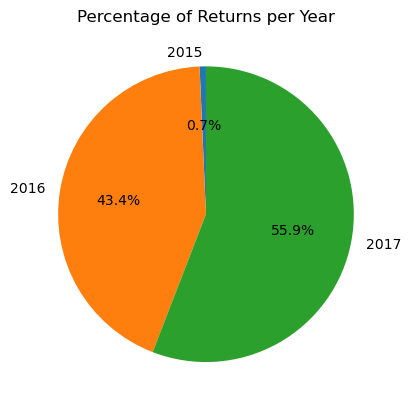

In [69]:
total_returns = return_analysis['TotalReturnQuantity'].sum()

percentages = (return_analysis['TotalReturnQuantity'] / total_returns) * 100

fig, ax = plt.subplots()
ax.pie(percentages, labels=return_analysis['Year'], autopct='%1.1f%%', startangle=90)
ax.set_title('Percentage of Returns per Year')
plt.show()

In [70]:
# Observation: 
# From 2015 to 2017, the total number of returns increased significantly. In 2015, the return rate was extremely low at 0.69%, but by 2016 
# and 2017, the return rates rose sharply to 43.44% and 55.87%, respectively

# Recommendation: 
# I recommend investigation into the causes behind the high return rates of products in 2016 and 2017. A focus on improving product quality and 
# customer satisfaction, especially for frequently returned items, could help mitigate losses from returns and enhance overall performance

In [71]:
# Analysis of Product Returns by Region - What are the most returned products by region 

In [72]:

conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")
cursor = conn.cursor()

query = '''
    SELECT 
        t.Region,
        p.ProductName,
        SUM(r.ReturnQuantity) AS TotalReturns,
        SUM(s.OrderQuantity) AS TotalOrderQuantity
    FROM sales s
    JOIN AdventureWorks_Products p ON s.ProductKey = p.ProductKey
    JOIN AdventureWorks_Territories t ON s.TerritoryKey = t.SalesTerritoryKey
    LEFT JOIN AdventureWorks_Returns r ON s.ProductKey = r.ProductKey
    WHERE r.ReturnQuantity IS NOT NULL
    GROUP BY t.Region, p.ProductName
    ORDER BY t.Region, TotalReturns DESC;
'''

returned_products_by_region = pd.read_sql_query(query, conn)
conn.close()

most_returned_products = returned_products_by_region.groupby('Region').first().reset_index()
most_returned_products

,Region,ProductName,TotalReturns,TotalOrderQuantity
0,Australia,Water Bottle - 30 oz.,116560,226927
1,Canada,Water Bottle - 30 oz.,85250,164645
2,Central,Patch Kit/8 Patches,190,276
3,France,Water Bottle - 30 oz.,51150,95658
4,Germany,Water Bottle - 30 oz.,57970,109664
5,Northeast,Mountain Tire Tube,372,637
6,Northwest,Water Bottle - 30 oz.,97495,188336
7,Southeast,Water Bottle - 30 oz.,775,1341
8,Southwest,Water Bottle - 30 oz.,136400,262687
9,United Kingdom,Water Bottle - 30 oz.,71300,136931


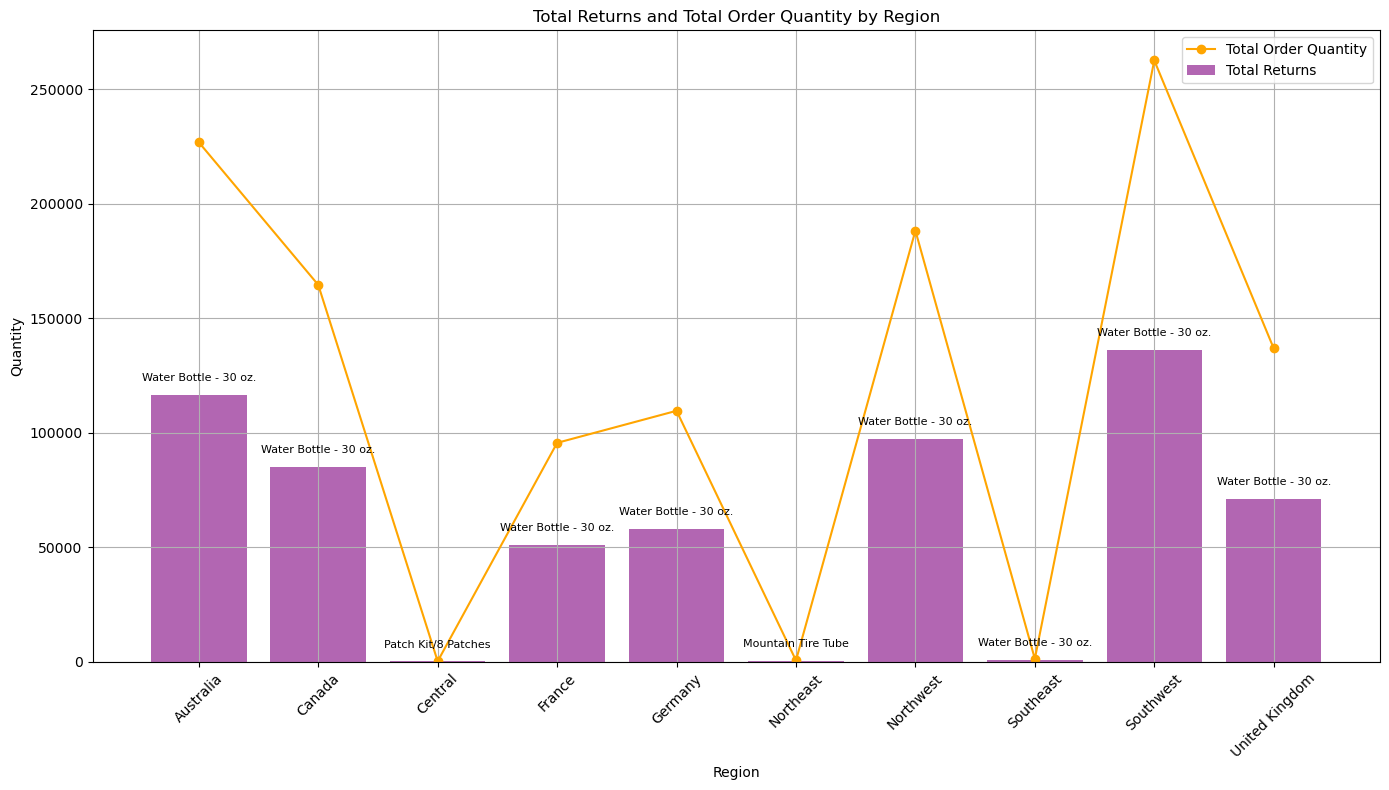

In [73]:
plt.figure(figsize=(14, 8))

plt.bar(most_returned_products['Region'], most_returned_products['TotalReturns'], 
        color='purple', label='Total Returns', alpha=0.6)

plt.plot(most_returned_products['Region'], most_returned_products['TotalOrderQuantity'], 
         color='orange', marker='o', label='Total Order Quantity')

for index, row in most_returned_products.iterrows():
    plt.annotate(row['ProductName'], (row['Region'], row['TotalReturns']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.xlabel('Region')
plt.ylabel('Quantity')
plt.title('Total Returns and Total Order Quantity by Region')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [74]:
# Observation:
# The analysis reveals that the Water Bottle - 30 oz. is the most returned product across multiple regions, with significant return quantities, 
# particularly in Australia (116,560 returns) and the Southwest region (136,400 returns). These high return rates suggest potential issues with the 
# product’s quality or customer satisfaction, particularly since the total order quantities are also high, indicating it is a popular item.

# Recommendation: 
# I recommend an investigation on the reasons behind the high return rates of the Water Bottle - 30 oz., possibly through customer feedback or quality 
# assessments. Improving product quality or addressing customer concerns could enhance satisfaction and reduce return rates.

In [75]:
# Return Rates of all Products by Region: A Comparative Analysis 
# (the Return Rate on all products and Total Order Quantity by Region) 

In [76]:

conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")
cursor = conn.cursor()

query = '''
SELECT 
    t.Region, 
    SUM(s.OrderQuantity) AS TotalOrderQuantity, 
    SUM(r.ReturnQuantity) AS TotalReturns, 
    (SUM(r.ReturnQuantity) * 100.0) / SUM(s.OrderQuantity) AS ReturnRate
FROM sales s
JOIN AdventureWorks_Returns r 
    ON s.ProductKey = r.ProductKey AND s.TerritoryKey = r.TerritoryKey
JOIN AdventureWorks_Territories t 
    ON s.TerritoryKey = t.SalesTerritoryKey
GROUP BY t.Region;
'''
return_rate = pd.read_sql(query, conn)
return_rate['ReturnRate'] = return_rate['ReturnRate'].round(2)
return_rate

,Region,TotalOrderQuantity,TotalReturns,ReturnRate
0,Australia,186399,111644,59.90
1,Canada,105745,59705,56.46
2,France,44243,26129,59.06
3,Germany,34746,20453,58.86
4,Northwest,109885,63009,57.34
5,Southeast,1,1,100.00
6,Southwest,195527,117902,60.30
7,United Kingdom,61470,35043,57.01


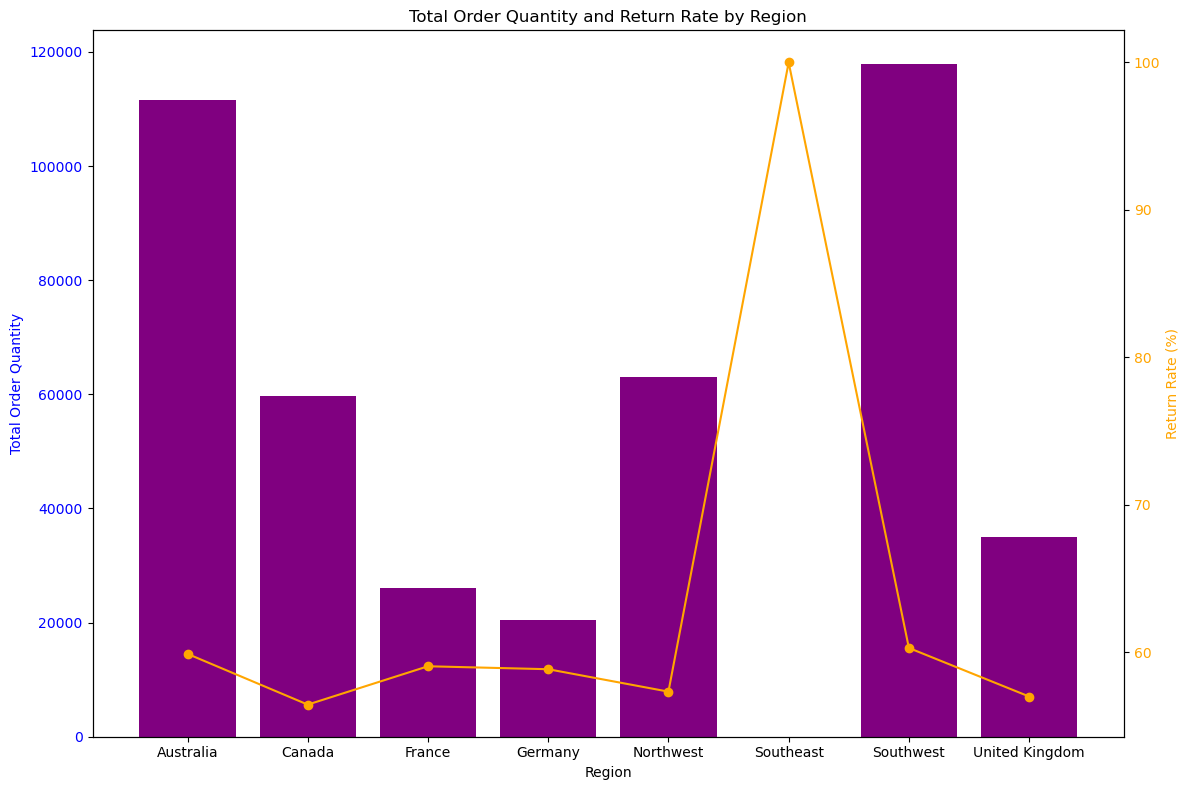

In [77]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.bar(return_rate['Region'], return_rate['TotalReturns'], color='purple', label='Total Returns')
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Order Quantity', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(return_rate['Region'], return_rate['ReturnRate'], color='orange', marker='o', label='Return Rate (%)')
ax2.set_ylabel('Return Rate (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Total Order Quantity and Return Rate by Region')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [78]:
# Observation:
# I observed that the Southeast region has an abnormally high return rate of 100%, though it only has 1 order. The other regions like Southwest (60.30%),
# Australia (59.90%), and Canada (56.46%) also demonstrate high return rates, indicating a significant portion of sales being returned. Overall, regions
# have return rates ranging from 56% to 60%, with notable consistency across multiple regions.

# Recommendation:
# Focus on improving product quality or customer satisfaction measures could help reduce returns and enhance profitability.

In [79]:
# Question 2

In [80]:
# Identify trend and patterns to discover the top-performing products and region based on sales in 2015, July 2016 and September 2017

In [81]:
conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")
cursor = conn.cursor()

queries = {
    '2015': '''
        SELECT 
            p.ProductName,
            r.Region,
            SUM(s.OrderQuantity) AS TotalOrderQuantity,
            SUM((s.OrderQuantity * p.ProductPrice) - (s.OrderQuantity * p.ProductCost)) AS TotalProfit,
            SUM(s.OrderQuantity * p.ProductPrice) AS TotalRevenue
        FROM sales s
        JOIN AdventureWorks_Products p ON s.ProductKey = p.ProductKey
        JOIN AdventureWorks_Territories r ON s.TerritoryKey = r.SalesTerritoryKey
        WHERE strftime('%Y', s.OrderDate) = '2015'
        GROUP BY p.ProductName, r.Region
        ORDER BY TotalOrderQuantity DESC
        LIMIT 1;
    ''',
    'July 2016': '''
        SELECT 
            p.ProductName,
            r.Region,
            SUM(s.OrderQuantity) AS TotalOrderQuantity,
            SUM((s.OrderQuantity * p.ProductPrice) - (s.OrderQuantity * p.ProductCost)) AS TotalProfit,
            SUM(s.OrderQuantity * p.ProductPrice) AS TotalRevenue
        FROM sales s
        JOIN AdventureWorks_Products p ON s.ProductKey = p.ProductKey
        JOIN AdventureWorks_Territories r ON s.TerritoryKey = r.SalesTerritoryKey
        WHERE strftime('%Y-%m', s.OrderDate) = '2016-07'
        GROUP BY p.ProductName, r.Region
        ORDER BY TotalOrderQuantity DESC
        LIMIT 1;
    ''',
    'September 2017': '''
        SELECT 
            p.ProductName,
            r.Region,
            SUM(s.OrderQuantity) AS TotalOrderQuantity,
            SUM((s.OrderQuantity * p.ProductPrice) - (s.OrderQuantity * p.ProductCost)) AS TotalProfit,
            SUM(s.OrderQuantity * p.ProductPrice) AS TotalRevenue
        FROM sales s
        JOIN AdventureWorks_Products p ON s.ProductKey = p.ProductKey
        JOIN AdventureWorks_Territories r ON s.TerritoryKey = r.SalesTerritoryKey
        WHERE strftime('%Y-%m', s.OrderDate) = '2017-09'
        GROUP BY p.ProductName, r.Region
        ORDER BY TotalOrderQuantity DESC
        LIMIT 1;
    '''
}

results = {}
for period, query in queries.items():
    try:
        result_df = pd.read_sql_query(query, conn)
        if not result_df.empty:  
            results[period] = result_df
    except Exception as e:
        print(f"Error fetching data for {period}: {e}")

if results: 
    combined_results = pd.concat(results.values(), keys=results.keys(), names=['Period']).reset_index(level=0)
else:
    combined_results = pd.DataFrame(columns=["Period", "ProductName", "Region", "TotalOrderQuantity", "TotalProfit", "TotalRevenue"])

# September 2017 with no data
if 'September 2017' not in combined_results['Period'].values:
    no_data_row = pd.DataFrame({
        'Period': ['September 2017'],
        'ProductName': [None],
        'Region': [None],
        'TotalOrderQuantity': [0],
        'TotalProfit': [0.0],
        'TotalRevenue': [0.0]
    })
    combined_results = pd.concat([combined_results, no_data_row], ignore_index=True)

combined_results = combined_results.sort_values(by=['Period'])
combined_results

,Period,ProductName,Region,TotalOrderQuantity,TotalProfit,TotalRevenue
0,2015,"Road-150 Red, 56",Australia,54,75976.6932,193226.58
1,July 2016,Water Bottle - 30 oz.,Australia,64,199.9168,319.36
2,September 2017,None,None,0,0.0000,0.00


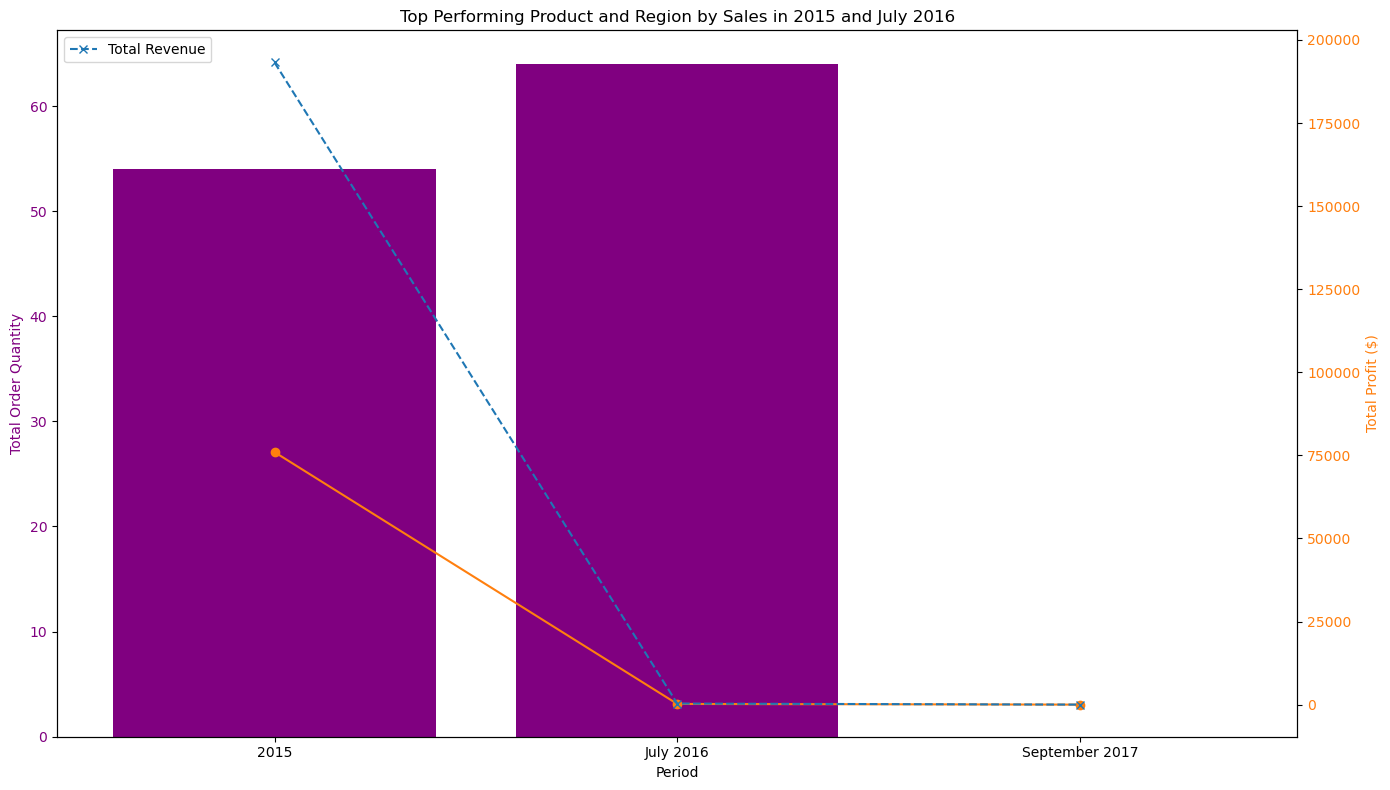

In [82]:
df = pd.DataFrame(combined_results)

fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'purple'
ax1.set_xlabel('Period')
ax1.set_ylabel('Total Order Quantity', color=color)
ax1.bar(df['Period'], df['TotalOrderQuantity'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Total Profit ($)', color=color)
ax2.plot(df['Period'], df['TotalProfit'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2.plot(df['Period'], df['TotalRevenue'], color=color, marker='x', linestyle='--', label='Total Revenue')
ax2.legend(loc='upper left')

ax1.grid(False)
ax2.grid(False)

plt.title('Top Performing Product and Region by Sales in 2015 and July 2016')
fig.tight_layout()
plt.show()

In [83]:
# Observation:
# the highest total order quantity was observed in July 2016, with 64 units of "Water Bottle - 30 oz." sold in Australia, generating a total profit
# of $199.92 and total revenue of $319.36. In 2015, the "Road-150 Red, 56" product was the best performer in terms of profit, generating $75,976.69 
# in profit from 54 units sold, resulting in a total revenue of $193,226.58. However, there were no sales recorded for September 2017

# Recommendation:
# given the high profit margins seen in 2015 from the "Road-150 Red, 56," the company may consider focusing on promoting similar high-margin products. 
# xploring market conditions and customer preferences in Australia during 2015 and 2016 could provide insights to replicate the success in other 
# regions and time periods.

In [84]:
## Which region is the best performing region 
# Regional Sales Performance Overview: Total Order Quantity, Profit, and Revenue

In [85]:

conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")
cursor = conn.cursor()

query = '''
    SELECT 
        r.Region,
        SUM(s.OrderQuantity) AS TotalOrderQuantity,
        SUM((s.OrderQuantity * p.ProductPrice) - (s.OrderQuantity * p.ProductCost)) AS TotalProfit,
        SUM(s.OrderQuantity * p.ProductPrice) AS TotalRevenue
    FROM sales s
    JOIN AdventureWorks_Products p ON s.ProductKey = p.ProductKey
    JOIN AdventureWorks_Territories r ON s.TerritoryKey = r.SalesTerritoryKey
    GROUP BY r.Region
    ORDER BY TotalRevenue DESC;
'''

region_analysis = pd.read_sql_query(query, conn)
region_analysis

,Region,TotalOrderQuantity,TotalProfit,TotalRevenue
0,Australia,17951,3.077023e+06,7.416456e+06
1,Southwest,17191,2.040345e+06,4.822795e+06
2,Northwest,12513,1.314751e+06,3.095074e+06
3,United Kingdom,9694,1.214774e+06,2.902562e+06
4,Germany,7950,1.054186e+06,2.524680e+06
5,France,7862,9.893461e+05,2.362643e+06
6,Canada,10894,7.578442e+05,1.769246e+06
7,Southeast,49,5.133288e+03,1.158562e+04
8,Northeast,40,2.874582e+03,6.401568e+03
9,Central,30,1.437441e+03,3.143060e+03


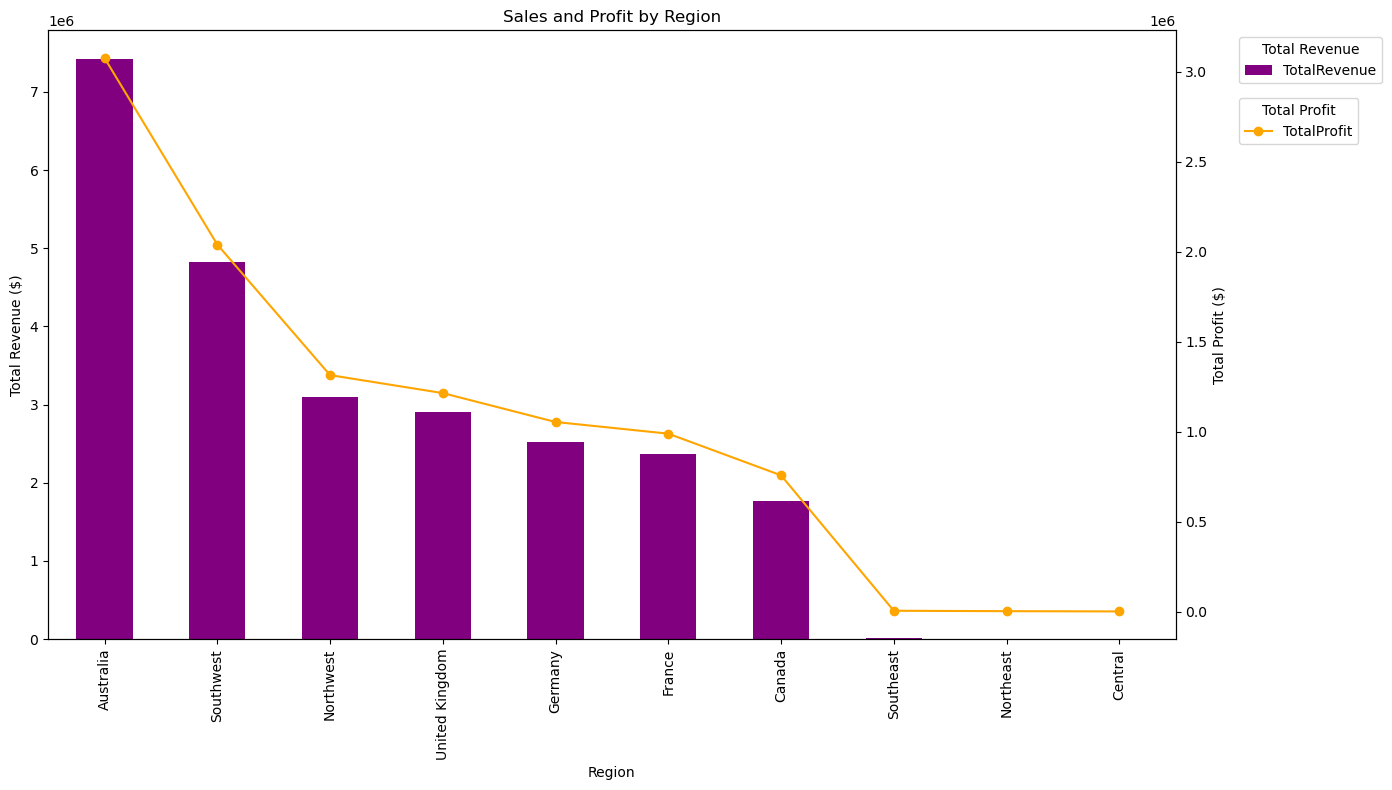

In [86]:
fig, ax1 = plt.subplots(figsize=(14, 8))

region_analysis.plot(kind='bar', x='Region', y='TotalRevenue', ax=ax1, color='purple', legend=True)
ax1.set_ylabel('Total Revenue ($)')
ax1.set_title('Sales and Profit by Region')
ax1.legend(title='Total Revenue', bbox_to_anchor=(1.05, 1), loc='upper left')

ax2 = ax1.twinx()
region_analysis.plot(kind='line', x='Region', y='TotalProfit', ax=ax2, color='orange', legend=True, marker='o')
ax2.set_ylabel('Total Profit ($)')
ax2.legend(title='Total Profit', bbox_to_anchor=(1.05, 0.9), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
# Observation:
# Australia recorded the highest sales performance, with a total order quantity of 17,951, generating the largest total profit of $3.08 million and 
# total revenue of $7.42 million. The Southwest and Northwest regions followed, with total profits of $2.04 million and $1.31 million, respectively.
# In contrast, regions like the Southeast, Northeast, and Central saw significantly lower performance, with minimal sales and profits.

# Recommendation:
# Efforts should focus on investigating the reasons behind the strong performance in Australia and the Southwest to replicate this success in other 
# regions, especially underperforming ones like the Southeast, Northeast, and Central.
# Marketing and product availability strategies should be considered to improve sales in these low-performing regions.

In [88]:
# Customer_Data!

In [89]:
## Key Performace Indicator (KPI)

In [90]:
conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")
cursor = conn.cursor()

query = '''
    SELECT 
    COUNT(DISTINCT CustomerKey) as TotalCustomer,
    SUM(CASE WHEN Gender = 'Male' THEN 1 ELSE 0 END) as TotalMale,
    SUM(CASE WHEN Gender = 'Female' THEN 1 ELSE 0 END) as TotalFemale,
    SUM(CASE WHEN MaritalStatus = 'Married' THEN 1 ELSE 0 END) as TotalMarried,
    SUM(CASE WHEN MaritalStatus = 'Single' THEN 1 ELSE 0 END) as TotalSingle,
    SUM(CASE WHEN HomeOwner = 'Yes' THEN 1 ELSE 0 END) as HouseOwner,
    SUM(CASE WHEN HomeOwner = 'No' THEN 1 ELSE 0 END) as Non_HouseOwner
    FROM AdventureWorks_Customers;
'''
Customer_Analysis = pd.read_sql_query(query, conn)
Customer_Analysis 

,TotalCustomer,TotalMale,TotalFemale,TotalMarried,TotalSingle,HouseOwner,Non_HouseOwner
0,18148,9126,8892,9817,8331,12260,5888


In [91]:
##  Retrieve Customer Age from BirthDate and group the Customer Age (Age_group)

In [92]:

conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")
cursor = conn.cursor()

from datetime import datetime
dataframes['AdventureWorks_Customers']['BirthDate'] = pd.to_datetime(dataframes['AdventureWorks_Customers']['BirthDate'], errors='coerce')

current_year = datetime.now().year # customer age
dataframes['AdventureWorks_Customers']['CustomerAge'] = current_year - dataframes['AdventureWorks_Customers']['BirthDate'].dt.year

# Group the Customer's age
bins = [40, 50, 60, 70, 100]  # Age ranges
labels = ['40-49', '50-59', '60-69','70+'] # categories
dataframes['AdventureWorks_Customers']['AgeGroup'] = pd.cut(dataframes['AdventureWorks_Customers']['CustomerAge'], bins=bins, labels=labels, right=False)

# Save the updated DataFrame back to the SQLite database, replacing the existing table
dataframes['AdventureWorks_Customers'].to_sql('AdventureWorks_Customers', conn, if_exists='replace', index=False)
dataframes['AdventureWorks_Customers'].head(3)

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,CustomerAge,AgeGroup
0,11000,MR.,JON,YANG,1966-04-08,Married,Male,jon24@adventure-works.com,"$90,000",2,Bachelors,Professional,Yes,58,50-59
1,11001,MR.,EUGENE,HUANG,1965-05-14,Single,Male,eugene10@adventure-works.com,"$60,000",3,Bachelors,Professional,No,59,50-59
2,11002,MR.,RUBEN,TORRES,1965-08-12,Married,Male,ruben35@adventure-works.com,"$60,000",3,Bachelors,Professional,Yes,59,50-59


In [93]:
# Question 3 

In [94]:
## 3. Analyze customer demographics and purchasing patterns to understand customer behaviour

In [95]:
conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")
cursor = conn.cursor()

query = '''
    SELECT 
        c.CustomerKey,
        c.CustomerAge,
        c.AgeGroup,
        c.Gender,
        c.TotalChildren,
        c.AnnualIncome,
        c.MaritalStatus,
        SUM(s.OrderQuantity) AS TotalOrderQuantity,
        SUM(s.OrderQuantity * p.ProductPrice) AS TotalRevenue,
        SUM((s.OrderQuantity * p.ProductPrice) - (s.OrderQuantity * p.ProductCost)) AS TotalProfit
    FROM sales s
    JOIN AdventureWorks_Customers c ON s.CustomerKey = c.CustomerKey
    JOIN AdventureWorks_Products p ON s.ProductKey = p.ProductKey
    GROUP BY c.CustomerKey, c.CustomerAge, c.AgeGroup, c.Gender, c.AnnualIncome, c.MaritalStatus
    ORDER BY TotalRevenue DESC;
'''

customer_analysis = pd.read_sql_query(query, conn)
customer_analysis

,CustomerKey,CustomerAge,AgeGroup,Gender,TotalChildren,AnnualIncome,MaritalStatus,TotalOrderQuantity,TotalRevenue,TotalProfit
0,11433,73,70+,Male,5,"$80,000",Married,13,12407.9545,5074.7670
1,11439,76,70+,Female,4,"$90,000",Married,19,12015.4029,4971.5382
2,11241,67,60-69,Female,2,"$100,000",Single,33,11330.4494,4780.9088
3,11417,79,70+,Female,5,"$70,000",Married,26,11085.7504,4650.9561
4,11420,78,70+,Male,2,"$100,000",Married,23,11022.4002,4611.7390
...,...,...,...,...,...,...,...,...,...,...
17411,29269,64,60-69,Female,4,"$90,000",Married,1,3.9900,2.4977
17412,11209,76,70+,Female,2,"$60,000",Married,1,2.2900,1.4335
17413,18304,67,60-69,Female,1,"$70,000",Single,1,2.2900,1.4335
17414,28016,79,70+,Male,5,"$20,000",Single,1,2.2900,1.4335


In [96]:
# Sales and Profit Analysis by Age Group: A Focus on High-Performing Demographics
# Analyse Total Order Quantity by Age-group and Total Revenue & Profit generated by each Age-group

In [97]:

age_groups = customer_analysis.groupby('AgeGroup').agg({'TotalOrderQuantity': 'sum', 'TotalRevenue': 'sum', 'TotalProfit': 'sum'})
age_groups['TotalRevenue'] = age_groups['TotalRevenue'].round(2)
age_groups['TotalProfit'] = age_groups['TotalProfit'].round(2)
age_groups

,TotalOrderQuantity,TotalRevenue,TotalProfit
AgeGroup,,,
40-49,9768,2239195.75,941943.28
50-59,28177,9576506.48,4000725.76
60-69,24693,7758871.44,3255733.11
70+,21376,5334496.93,2256403.46


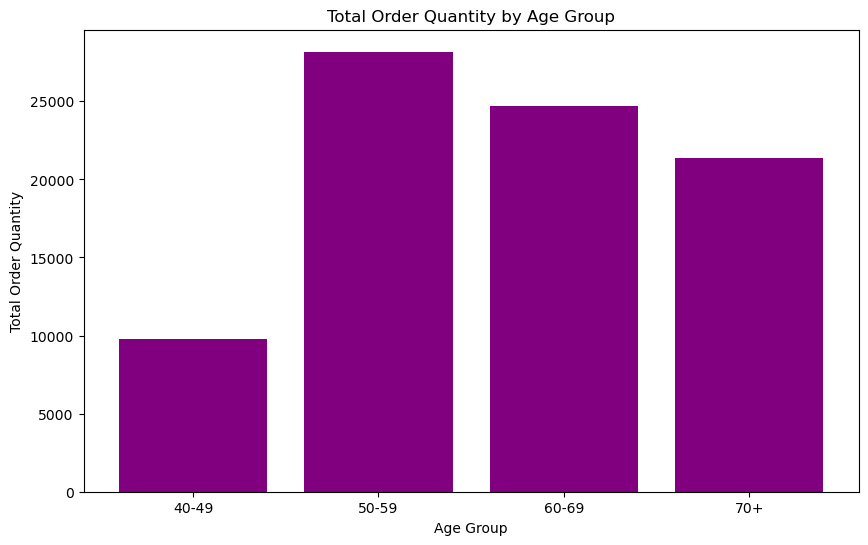

In [98]:
# Total Order Quantity by Age-group 

plt.figure(figsize=(10, 6))
plt.bar(age_groups.index, age_groups['TotalOrderQuantity'], color='purple')
plt.xlabel('Age Group')
plt.ylabel('Total Order Quantity')
plt.title('Total Order Quantity by Age Group')
plt.show()

In [99]:
# Observation:
# The age group 50-59 significantly outperformed all other age groups, generating the highest Total Order Quantity (28,177), 
# Total Revenue (9,576,506.48), and Total Profit (4,000,725.76). The 60-69 age group follows closely behind, while the 40-49 and 70+ groups also 
# contributed notably but at a lower scale

# Recommendation: 
# Given the high performance of the 50-59 and 60-69 age groups, marketing efforts should be intensified toward these demographics

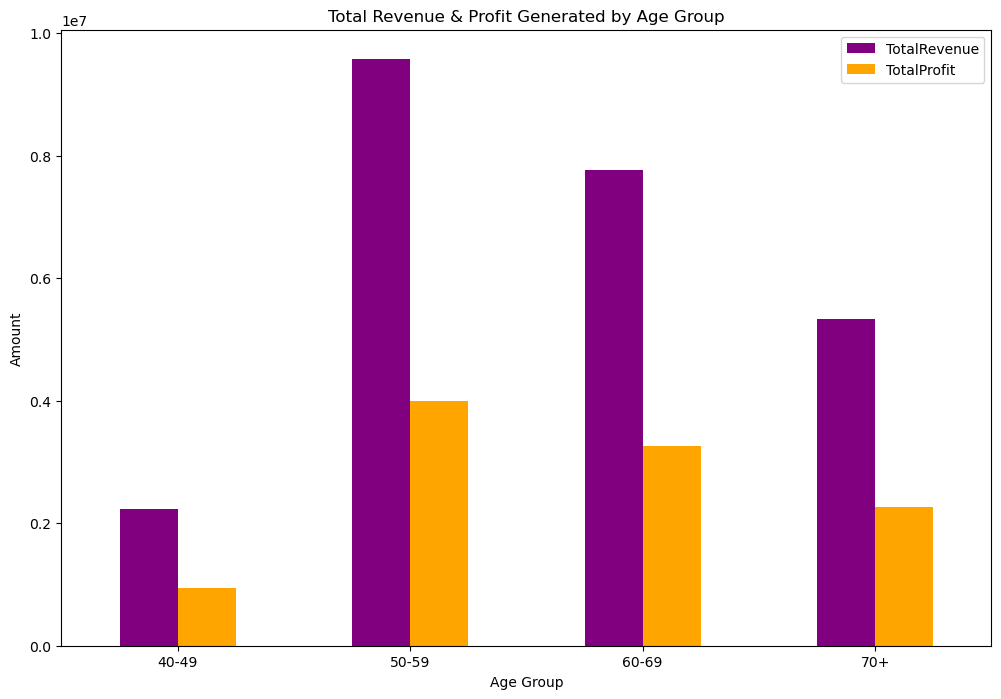

In [100]:
#Total Revenue & Profit generated by Age-group

fig, ax = plt.subplots(figsize=(12, 8))

age_groups[['TotalRevenue', 'TotalProfit']].plot(kind='bar', ax=ax, color=['purple', 'orange'])

plt.xlabel('Age Group')
plt.ylabel('Amount')
plt.title('Total Revenue & Profit Generated by Age Group')
plt.xticks(rotation=0)
plt.legend()
plt.show()

In [101]:
# Observation:
# The age group 50-59 significantly outperformed all other age groups, generating the highest Total Order Quantity (28,177), 
# Total Revenue (9,576,506.48), and Total Profit (4,000,725.76). The 60-69 age group follows closely behind, while the 40-49 and 70+ groups also 
# contributed notably but at a lower scale

# Recommendation: 
# Given the high performance of the 50-59 and 60-69 age groups, marketing efforts should be intensified toward these demographics

In [102]:
# "Income Group Analysis: Revenue and Profit Trends Across Income Segments"
# Analyse Total Order Quantity by Customers Annual Income and Total Revenue & Profit generated by Customers AAnnual Income

In [103]:

income_groups = customer_analysis.groupby('AnnualIncome').agg({'TotalOrderQuantity': 'sum', 'TotalRevenue': 'sum', 'TotalProfit': 'sum'})
income_groups['TotalRevenue'] = income_groups['TotalRevenue'].round(2)
income_groups['TotalProfit'] = income_groups['TotalProfit'].round(2)
income_groups

,TotalOrderQuantity,TotalRevenue,TotalProfit
AnnualIncome,,,
"$10,000",4824,1155152.29,486485.82
"$100,000",2651,932078.90,390037.06
"$110,000",2392,843975.62,356935.97
"$120,000",1726,657939.77,277505.94
"$130,000",2691,1026503.17,435318.10
"$150,000",533,214262.05,91001.19
"$160,000",510,170389.24,71388.29
"$170,000",630,267259.18,113191.57
"$20,000",7358,1724605.40,716451.53


In [104]:
# Group the Customer Annual Income

customer_analysis['AnnualIncome'] = customer_analysis['AnnualIncome'].replace({'\$': '', ',': ''}, regex=True).astype(int)

bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
labels = ['<20K', '20K-40K', '40K-60K', '60K-80K', '80K-100K', '>100K']

customer_analysis['IncomeGroup'] = pd.cut(customer_analysis['AnnualIncome'], bins=bins, labels=labels, right=False)

income_groups = customer_analysis.groupby('IncomeGroup').agg({
    'TotalOrderQuantity': 'sum',
    'TotalRevenue': 'sum',
    'TotalProfit': 'sum'
}).reset_index()

income_groups['TotalRevenue'] = income_groups['TotalRevenue'].round(2)
income_groups['TotalProfit'] = income_groups['TotalProfit'].round(2)
income_groups

C:\Users\ifeoma.adigwe\AppData\Local\Temp\ipykernel_38588\3392693804.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_groups = customer_analysis.groupby('IncomeGroup').agg({


,IncomeGroup,TotalOrderQuantity,TotalRevenue,TotalProfit
0,<20K,4824,1155152.29,486485.82
1,20K-40K,17080,4231240.34,1750623.58
2,40K-60K,15407,4321630.35,1810729.06
3,60K-80K,24585,7259507.40,3050671.99
4,80K-100K,11145,3834648.50,1623826.88
5,>100K,11133,4112407.94,1735378.11


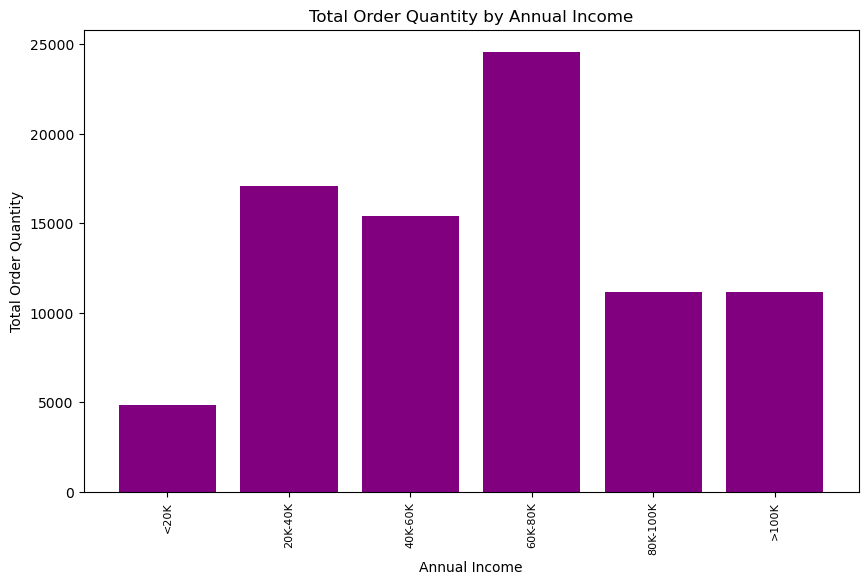

In [105]:
# Total Order Quantity by Customers Annual Income 

plt.figure(figsize=(10, 6))
plt.bar(income_groups['IncomeGroup'], income_groups['TotalOrderQuantity'], color='purple')
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Annual Income')
plt.ylabel('Total Order Quantity')
plt.title('Total Order Quantity by Annual Income')
plt.show()

In [106]:
# Observation:
# The 60K-80K income group generated the highest Total Order Quantity (24,585), Total Revenue (7,259,507.40), and Total Profit (3,050,671.99), 
# outperforming all other income segments. The 20K-40K and 40K-60K groups also show strong performance, whereas the lowest contribution comes from 
# the <20K income group, despite making a noticeable impact

# Recommendation: 
# Marketing efforts should focus on high-income groups, particularly the 60K-80K bracket, as they offer the greatest profitability. However, 
# considering the substantial contribution from the 20K-40K and 40K-60K groups, personalized offers and promotions may help optimize revenue within 
# these segment

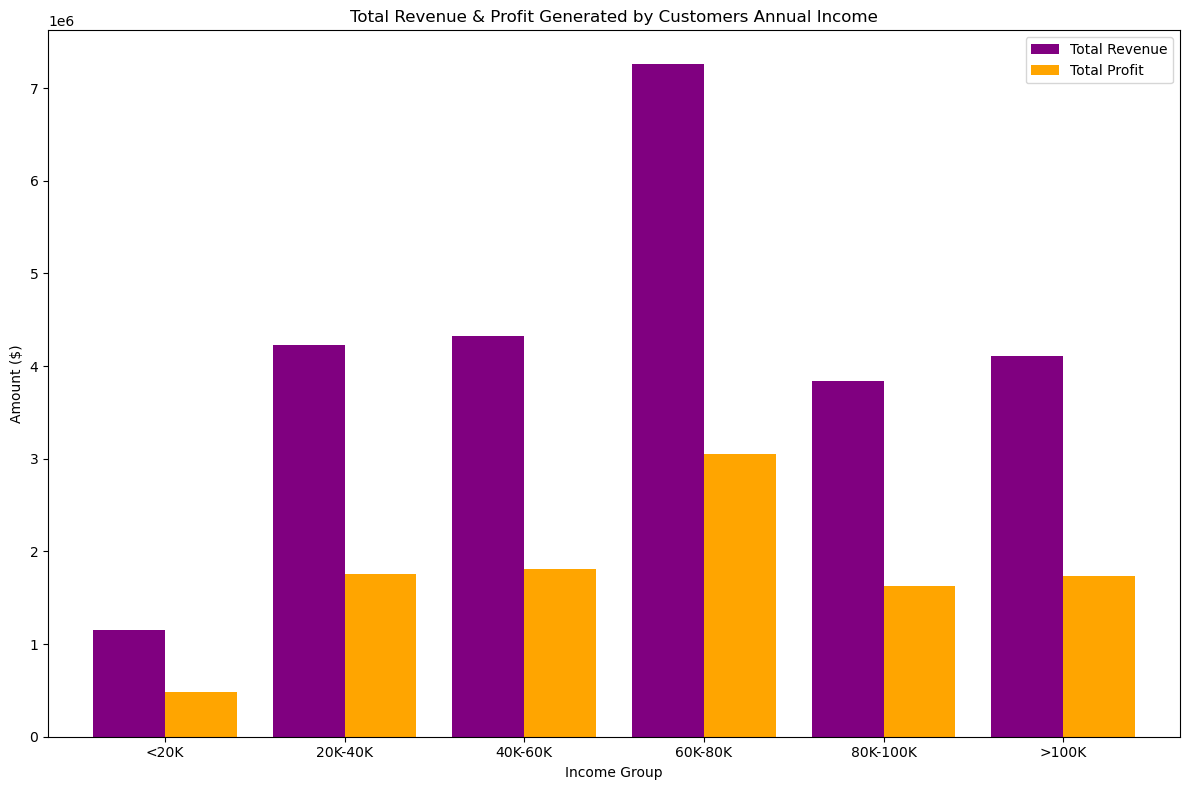

In [107]:
fig, ax = plt.subplots(figsize=(12, 8))

income_groups[['TotalRevenue', 'TotalProfit']].plot(
    kind='bar', 
    ax=ax, 
    color=['purple', 'orange'],
    width=0.8
)
ax.set_xticklabels(income_groups['IncomeGroup'], rotation=0)

plt.xlabel('Income Group')
plt.ylabel('Amount ($)')
plt.title('Total Revenue & Profit Generated by Customers Annual Income')

plt.legend(['Total Revenue', 'Total Profit'])
plt.tight_layout()
plt.show()

In [108]:
# Observation:
# The 60K-80K income group generated the highest Total Order Quantity (24,585), Total Revenue (7,259,507.40), and Total Profit (3,050,671.99), 
# outperforming all other income segments. The 20K-40K and 40K-60K groups also show strong performance, whereas the lowest contribution comes from 
# the <20K income group, despite making a noticeable impact

# Recommendation: 
# Marketing efforts should focus on high-income groups, particularly the 60K-80K bracket, as they offer the greatest profitability. However, 
# considering the substantial contribution from the 20K-40K and 40K-60K groups, personalized offers and promotions may help optimize revenue within 
# these segment

In [109]:
# Analysis of Sales Performance Based on Number of Children: Insights into Consumer Behavior

In [110]:
# Check the unique values in the column "Total Children"

unique_values = dataframes['AdventureWorks_Customers']['TotalChildren'].unique()
print(unique_values)

[2 3 0 5 4 1]


In [111]:
# Analyse Total Order Quantity by Customers TotalChildren and Total Revenue & Profit generated by Customers with Children

totalchildren_groups = customer_analysis.groupby('TotalChildren').agg({'TotalOrderQuantity': 'sum', 'TotalRevenue': 'sum', 'TotalProfit': 'sum'})
totalchildren_groups['TotalRevenue'] = totalchildren_groups['TotalRevenue'].round(2)
totalchildren_groups['TotalProfit'] = totalchildren_groups['TotalProfit'].round(2)
totalchildren_groups

,TotalOrderQuantity,TotalRevenue,TotalProfit
TotalChildren,,,
0,23708,7363935.22,3082735.42
1,15762,5394585.60,2248163.51
2,17029,5232751.78,2187363.21
3,9805,2851565.67,1197667.81
4,11070,2570275.11,1095690.65
5,6800,1501473.44,646094.82


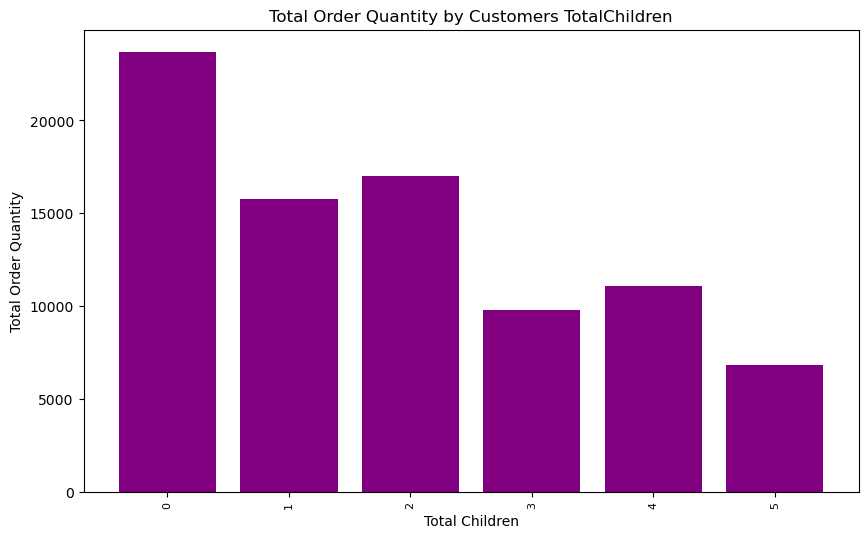

In [112]:
# Total Order Quantity by Customers with children 

plt.figure(figsize=(10, 6))
plt.bar(totalchildren_groups.index, totalchildren_groups['TotalOrderQuantity'], color='purple')
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Total Children')
plt.ylabel('Total Order Quantity')
plt.title('Total Order Quantity by Customers TotalChildren')
plt.show()

In [113]:
# Observation: 
# Households with no children have the highest Total Order Quantity (23,708), Total Revenue (7,363,935.22), and Total Profit (3,082,735.42). Families 
# with two children also contribute significantly to the revenue and profit, followed by families with one child. Meanwhile, households with five 
# children show the lowest revenue and profit margins

# Recommendation: 
# Target marketing campaigns should focus on child-free households and families with one or two children, as these groups demonstrate the highest 
# profitability

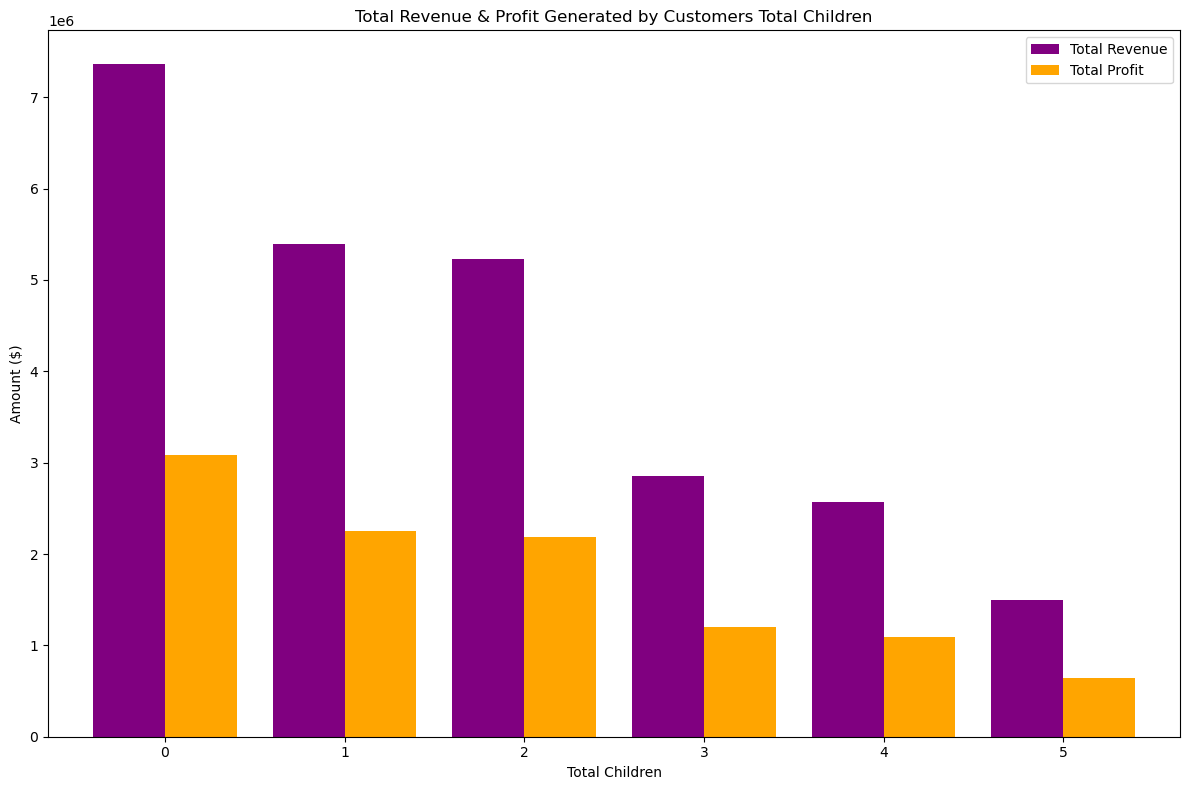

In [114]:
fig, ax = plt.subplots(figsize=(12, 8))

totalchildren_groups[['TotalRevenue', 'TotalProfit']].plot(
    kind='bar', 
    ax=ax, 
    color=['purple', 'orange'],
    width=0.8
)
ax.set_xticklabels(totalchildren_groups.index, rotation=0)

plt.xlabel('Total Children')
plt.ylabel('Amount ($)')
plt.title('Total Revenue & Profit Generated by Customers Total Children')

plt.legend(['Total Revenue', 'Total Profit'])
plt.tight_layout()
plt.show()

In [115]:
# Observation: 
# Households with no children have the highest Total Order Quantity (23,708), Total Revenue (7,363,935.22), and Total Profit (3,082,735.42). Families 
# with two children also contribute significantly to the revenue and profit, followed by families with one child. Meanwhile, households with five 
# children show the lowest revenue and profit margins

# Recommendation: 
# Target marketing campaigns should focus on child-free households and families with one or two children, as these groups demonstrate the highest 
# profitability

In [116]:
# Analysis of Sales Performance by Marital Status: Insights and Strategies

In [117]:

marital_groups = customer_analysis.groupby('MaritalStatus').agg({'TotalOrderQuantity': 'sum', 'TotalRevenue': 'sum', 'TotalProfit': 'sum'})
marital_groups['TotalRevenue'] = marital_groups['TotalRevenue'].round(2)
marital_groups['TotalProfit'] = marital_groups['TotalProfit'].round(2)
marital_groups

,TotalOrderQuantity,TotalRevenue,TotalProfit
MaritalStatus,,,
Married,46689,12899964.50,5432390.55
Single,37485,12014622.32,5025324.89


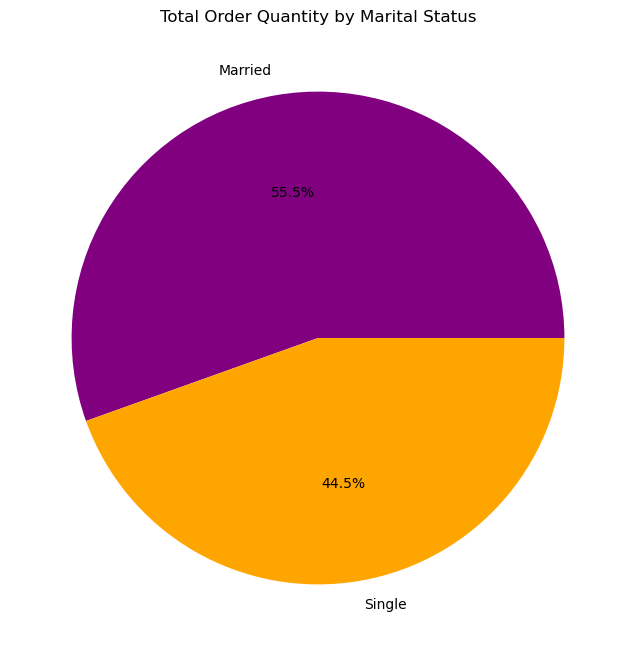

In [118]:
# Creating DataFrame and resetting the index
df_reset = marital_groups.reset_index()

# Visualizing Total Order Quantity by Marital Status with a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_reset['TotalOrderQuantity'], labels=df_reset['MaritalStatus'], autopct='%1.1f%%', colors=['purple', 'orange'])
plt.title('Total Order Quantity by Marital Status')
plt.show()


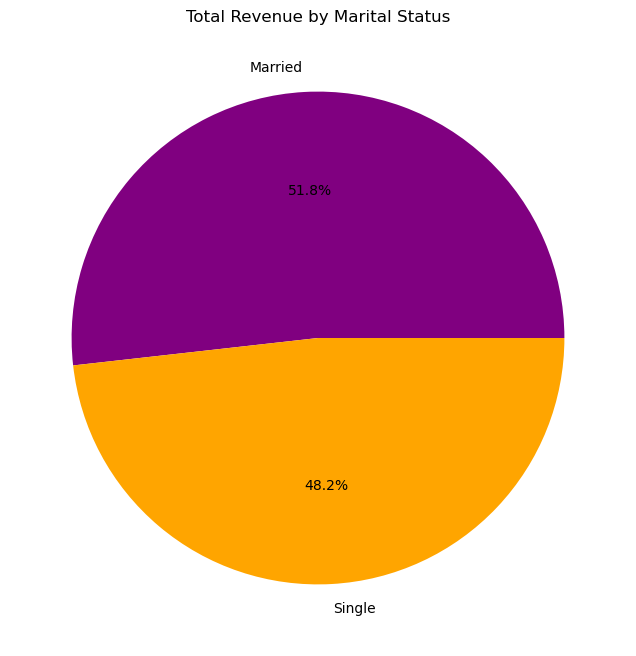

In [119]:
df_reset = marital_groups.reset_index()

plt.figure(figsize=(8, 8))
plt.pie(df_reset['TotalRevenue'], labels=df_reset['MaritalStatus'], autopct='%1.1f%%', colors=['purple', 'orange'])
plt.title('Total Revenue by Marital Status')
plt.show()

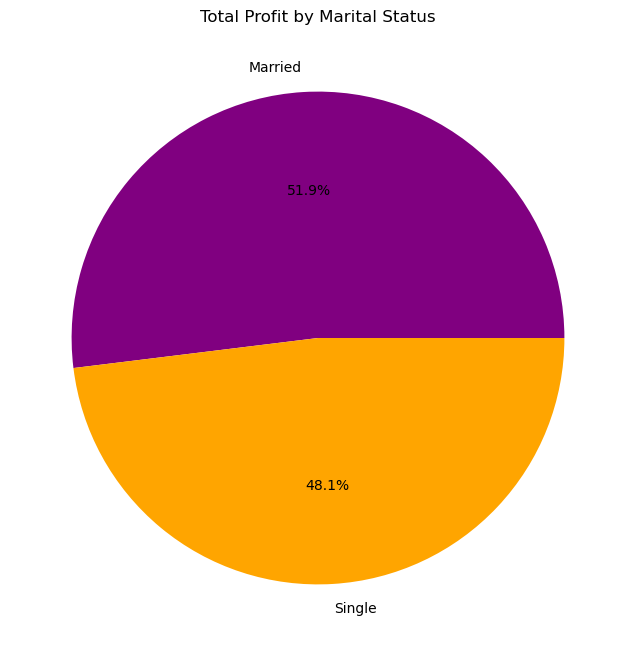

In [120]:
df_reset = marital_groups.reset_index()

# Plotting the pie chart for Total Profit
plt.figure(figsize=(8, 8))
plt.pie(df_reset['TotalProfit'], labels=df_reset['MaritalStatus'], autopct='%1.1f%%', colors=['purple', 'orange'])
plt.title('Total Profit by Marital Status')
plt.show()

In [121]:
# Observation: 
# The analysis of sales data reveals that married customers have a higher Total Order Quantity (46,689) compared to single customers (37,485). 
# Married customers contribute more to Total Revenue ($12,899,964.50) and Total Profit ($5,432,390.55) than their single counterparts, 
# who generated $12,014,622.32 in revenue and $5,025,324.89 in profit.

# Recommendation: 
# Promotions or bundled offers that appeal to families or couples could enhance sales further.

In [122]:

gender_groups = customer_analysis.groupby('Gender').agg({'TotalOrderQuantity': 'sum', 'TotalRevenue': 'sum', 'TotalProfit': 'sum'})
gender_groups['TotalRevenue'] = gender_groups['TotalRevenue'].round(2)
gender_groups['TotalProfit'] = gender_groups['TotalProfit'].round(2)
gender_groups

,TotalOrderQuantity,TotalRevenue,TotalProfit
Gender,,,
Female,41228,12515051.37,5253895.33
Male,42357,12243621.37,5138195.53
NA,589,155914.08,65624.57


In [123]:
# Question 4

In [124]:
##4. Perform customer segmentation based on purcgasing or spending power using SQL

In [125]:
# Customer Purchase Analysis: Revenue vs. Profit

In [126]:
conn = sqlite3.connect(r"C:\Users\ifeoma.adigwe\Documents\AdventureWorks.db")
cursor = conn.cursor()

query = '''
SELECT 
    c.CustomerKey,
    c.FirstName || ' ' || c.LastName AS "Full Name",
    c.CustomerAge,
    c.Gender, 
    c.MaritalStatus, 
    c.AnnualIncome, 
    c.HomeOwner,
    SUM(s.OrderQuantity) AS TotalOrderQuantity,
    SUM(s.OrderQuantity * p.ProductPrice) AS TotalRevenue,
    SUM((s.OrderQuantity * p.ProductPrice) - (s.OrderQuantity * p.ProductCost)) AS TotalProfit
FROM 
    sales s
JOIN 
    AdventureWorks_Customers c ON s.CustomerKey = c.CustomerKey
JOIN 
    AdventureWorks_Products p ON s.ProductKey = p.ProductKey
GROUP BY 
    c.CustomerKey
ORDER BY 
    TotalRevenue DESC
LIMIT 10;
'''

top_customers = pd.read_sql(query, conn)
top_customers

,CustomerKey,Full Name,CustomerAge,Gender,MaritalStatus,AnnualIncome,HomeOwner,TotalOrderQuantity,TotalRevenue,TotalProfit
0,11433,MAURICE SHAN,73,Male,Married,"$80,000",No,13,12407.9545,5074.7670
1,11439,JANET MUNOZ,76,Female,Married,"$90,000",No,19,12015.4029,4971.5382
2,11241,LISA CAI,67,Female,Single,"$100,000",Yes,33,11330.4494,4780.9088
3,11417,LACEY ZHENG,79,Female,Married,"$70,000",Yes,26,11085.7504,4650.9561
4,11420,JORDAN TURNER,78,Male,Married,"$100,000",Yes,23,11022.4002,4611.7390
5,11242,LARRY MUNOZ,67,Male,Married,"$110,000",Yes,14,10852.0340,4505.9653
6,13263,KATE ANAND,68,Female,Single,"$110,000",Yes,18,10436.5079,4246.1004
7,12655,LARRY VAZQUEZ,75,Male,Married,"$80,000",Yes,12,10394.9836,4222.8261
8,11425,ARIANA GRAY,70,Female,Married,"$90,000",Yes,22,10391.4304,4403.1453
9,12631,CLARENCE GAO,80,Male,Single,"$70,000",Yes,17,10331.7349,4200.6771


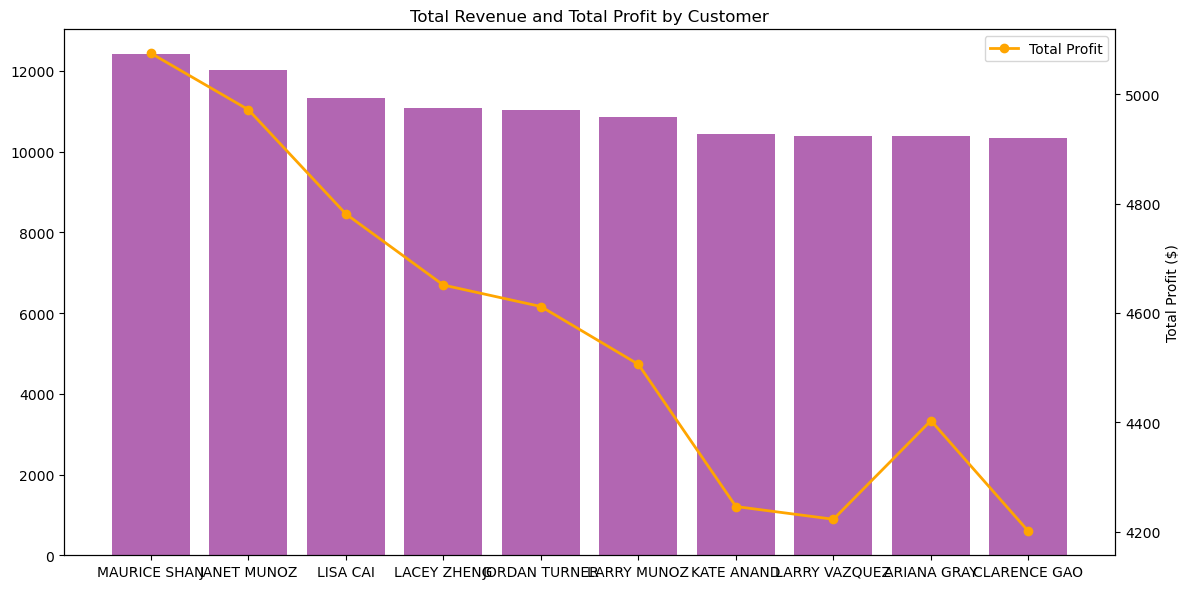

In [127]:

df = pd.DataFrame(top_customers)

plt.figure(figsize=(12,6))

plt.bar(df['Full Name'], df['TotalRevenue'], color='purple', label='Total Revenue', alpha=0.6)

ax2 = plt.gca().twinx()

ax2.plot(df['Full Name'], df['TotalProfit'], color='orange', marker='o', label='Total Profit', linewidth=2)

plt.title('Total Revenue and Total Profit by Customer')
plt.xlabel('Customer Names')
plt.ylabel('Total Revenue ($)')
ax2.set_ylabel('Total Profit ($)')

plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation = 'vertical', size = 8)

plt.tight_layout()
plt.show()

In [128]:
# Observations:
# Total Revenue and Total Profit vary among customers, indicating differing purchasing patterns and profitability.
# Customers such as MAURICE SHAN and JANET MUNOZ contribute significantly to both revenue and profit, suggesting they are valuable to the business.

# Recommendations:
# Focus on retaining high-revenue customers and consider loyalty programs to enhance their purchasing frequency.
# Analyze the purchasing behavior of customers with lower profit margins to identify opportunities for increasing profitability.